In [1]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import gamma
import os
import math

In [23]:
model_full = CmdStanModel(stan_file='simple_admixture_naive.stan')
model_Nfixed = CmdStanModel(stan_file = 'simple_admixture_naive_N.stan')
model_NTfixed = CmdStanModel(stan_file = 'simple_admixture_naive_NT.stan')

19:00:00 - cmdstanpy - INFO - compiling stan file E:\code\admix_stan\data_file\simple_admixture_naive.stan to exe file E:\code\admix_stan\data_file\simple_admixture_naive.exe
19:00:28 - cmdstanpy - INFO - compiled model executable: E:\code\admix_stan\data_file\simple_admixture_naive.exe


In [20]:
#Load the data for further inference
df = pd.read_json("admixture_200.json")
df['index'] = df['index'].apply(tuple)
df['group'] = df['group'].apply(tuple)
df[(df['u'] >= 0.5) & (df['true_T1'] == 10) & (df['true_T2'] == 110)].groupby(['index', 'group']).sum()

,,number,fraction,u,v,true_N,true_T1,true_T2
index,group,,,,,,,
"(0, 1)","(0, 0)",12,0.040448,94.575,693.075,306000,540,5940
"(0, 2)","(0, 0)",15,0.217401,94.575,693.075,306000,540,5940
"(0, 3)","(0, 0)",16,0.068680,94.575,693.075,306000,540,5940
"(0, 4)","(0, 0)",18,0.082754,94.575,693.075,306000,540,5940
"(0, 5)","(0, 0)",21,0.084663,94.575,693.075,306000,540,5940
...,...,...,...,...,...,...,...,...
"(26, 28)","(2, 2)",15,0.064326,94.575,693.075,306000,540,5940
"(26, 29)","(2, 2)",15,0.056922,94.575,693.075,306000,540,5940
"(27, 28)","(2, 2)",10,0.037982,94.575,693.075,306000,540,5940


In [4]:
df_4_inference = df[['number','u','v','group']][(df['true_T1'] == 20) & (df['true_T2'] == 1000) & (df['true_N'] == 5000)]
data_4_inference = df_4_inference.to_dict(orient='list')
data_4_inference['N_obs'] = len(data_4_inference['number'])
data_4_inference['length'] = 200
data_4_inference['N_obs']

10875

In [22]:
df_4_inference = df[['number','u','v','group']][(df['true_T1'] == 50) & (df['true_T2'] == 1000) & (df['true_N'] == 5000)]
data_4_inference = df_4_inference.to_dict(orient='list')
data_4_inference['N_obs'] = len(data_4_inference['number'])
data_4_inference['length'] = 200
Ndata_4_inference = data_4_inference 
Ndata_4_inference['N']= 10000
NT_data_4_inference = Ndata_4_inference
NT_data_4_inference['T2'] = 1000


In [23]:
v = model_NTfixed.sample(data = NT_data_4_inference)
v.summary()

12:39:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:40:16 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-2732.150000,0.028126,1.088400,-2734.380000,-2731.820000,-2731.130000,1497.45,15.0822,1.00158
T1,42.576000,0.177682,8.866590,27.240700,42.794700,56.736500,2490.16,25.0807,1.00084
fraction,0.214446,0.000260,0.012994,0.192944,0.214267,0.236281,2496.69,25.1464,1.00139


In [24]:
v_generalized = model_full.sample(data = data_4_inference)
v_generalized.summary()

19:27:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:37:45 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-4510.29000,0.065763,2.12975,-4514.29000,-4509.86000,-4507.59000,1048.80000,1.05086,1.003800
N[1],10470.80000,10.783200,536.91700,9601.33000,10461.30000,11384.50000,2479.26000,2.48415,1.001180
N[2],50883.80000,568.131000,27824.30000,9369.57000,50289.90000,95555.80000,2398.57000,2.40330,0.999858
N[3],8998.02000,7.452450,327.60800,8469.02000,8994.17000,9538.57000,1932.46000,1.93627,1.000230
N[4],11525.50000,150.242000,5623.66000,5326.44000,10082.70000,22592.20000,1401.06000,1.40382,1.001210
T1,18.20867,0.205770,8.19945,4.62382,18.37110,31.67050,1587.76150,1.59089,1.003560
T2,886.63381,1.876750,72.35304,756.88400,894.42400,988.55400,1486.28570,1.48922,1.001580
fraction,0.25808,0.000460,0.01953,0.22671,0.25721,0.29057,1764.06576,1.76754,1.001260


In [31]:
v = model_NTfixed.pathfinder(data = NT_data_4_inference, show_console=True)
v


16:48:52 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = pathfinder
Chain [1] pathfinder
Chain [1] init_alpha = 0.001 (Default)
Chain [1] tol_obj = 9.9999999999999998e-013 (Default)
Chain [1] tol_rel_obj = 10000 (Default)
Chain [1] tol_grad = 1e-008 (Default)
Chain [1] tol_rel_grad = 10000000 (Default)
Chain [1] tol_param = 1e-008 (Default)
Chain [1] history_size = 5 (Default)
Chain [1] num_psis_draws = 1000 (Default)
Chain [1] num_paths = 4 (Default)
Chain [1] save_single_paths = 0 (Default)
Chain [1] max_lbfgs_iters = 1000 (Default)
Chain [1] num_draws = 1000 (Default)
Chain [1] num_elbo_draws = 25 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\Qi\AppData\Local\Temp\tmp4nw_jo3g\ef1qg4hf.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] seed = 15314
Chain [1] output
Chain [1] file = C:\Users\Qi\AppData\Local\Temp\tmp4nw_jo3g\simple_admixture_naive_NT2rr_tqrh\simple_admixture_naive_NT-20250206164852.csv
Chain [1] diagnostic_file =  (Default)
Chain [1] refresh = 100 (Default)
Chain 

16:48:58 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Total log probability function evaluations:4704
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [

CmdStanPathfinder: model=simple_admixture_naive_NT['method=pathfinder']
 csv_files:
	C:\Users\Qi\AppData\Local\Temp\tmp4nw_jo3g\simple_admixture_naive_NT2rr_tqrh\simple_admixture_naive_NT-20250206164852.csv
 output_files:
	C:\Users\Qi\AppData\Local\Temp\tmp4nw_jo3g\simple_admixture_naive_NT2rr_tqrh\simple_admixture_naive_NT-20250206164852_0-stdout.txt

In [36]:
N_list = [2000,5000,10000]
T1_list = [10,20,50]
T2_list = [60,100,200,1000]
output = {'seed':[],'True_T1':[],'Estimated_T1':[], 'True_fraction':[],'Estimated_fraction':[],'True_N':[], 'True_T2':[]}
for N in N_list:
    for T1 in T1_list:
        for T2 in T2_list:
            for seed in np.arange(100,1600,100):
                df = pd.read_json(f"admixture_{seed}.json")
                df_4_inference = df[['number','u','v','group']][(df['true_T1'] == T1) & (df['true_T2'] == T2) & (df['true_N'] == N)]
                data_4_inference = df_4_inference.to_dict(orient='list')
                data_4_inference['N_obs'] = len(data_4_inference['number'])
                data_4_inference['length'] = 200
                Ndata_4_inference = data_4_inference 
                Ndata_4_inference['N']= 2*N
                NT_data_4_inference = Ndata_4_inference
                NT_data_4_inference['T2'] = T2
                v = model_NTfixed.pathfinder(data = NT_data_4_inference,seed = 100)
                estimated_fraction = sum(v.stan_variable('fraction'))/len(v.stan_variable('fraction'))
                print(estimated_fraction)
                estimated_T1 = sum(v.stan_variable('T1'))/len(v.stan_variable('T1'))
                o = {'seed':[seed],'True_T1':[T1],'Estimated_T1':[estimated_T1], 'True_fraction':[0.25],'Estimated_fraction':[estimated_fraction],'True_N':[N], 'True_T2':[T2]}
                output = pd.concat([pd.DataFrame(output),pd.DataFrame(o)],ignore_index=True)





17:59:26 - cmdstanpy - INFO - Chain [1] start processing
17:59:33 - cmdstanpy - INFO - Chain [1] done processing


0.5137770009999998


17:59:33 - cmdstanpy - INFO - Chain [1] start processing
17:59:41 - cmdstanpy - INFO - Chain [1] done processing


0.21147626869999972


17:59:41 - cmdstanpy - INFO - Chain [1] start processing
17:59:48 - cmdstanpy - INFO - Chain [1] done processing


0.19576176599999962


17:59:48 - cmdstanpy - INFO - Chain [1] start processing
17:59:55 - cmdstanpy - INFO - Chain [1] done processing


0.27013351550000014


17:59:55 - cmdstanpy - INFO - Chain [1] start processing
18:00:02 - cmdstanpy - INFO - Chain [1] done processing


0.13212598039999987


18:00:02 - cmdstanpy - INFO - Chain [1] start processing
18:00:09 - cmdstanpy - INFO - Chain [1] done processing


0.09984259262999994


18:00:09 - cmdstanpy - INFO - Chain [1] start processing
18:00:16 - cmdstanpy - INFO - Chain [1] done processing


0.25767902500000023


18:00:17 - cmdstanpy - INFO - Chain [1] start processing
18:00:23 - cmdstanpy - INFO - Chain [1] done processing


0.21572882029999998


18:00:24 - cmdstanpy - INFO - Chain [1] start processing
18:00:30 - cmdstanpy - INFO - Chain [1] done processing


0.31388559799999965


18:00:30 - cmdstanpy - INFO - Chain [1] start processing
18:00:37 - cmdstanpy - INFO - Chain [1] done processing


0.1950877672999998


18:00:37 - cmdstanpy - INFO - Chain [1] start processing
18:00:44 - cmdstanpy - INFO - Chain [1] done processing


0.35731807599999993


18:00:44 - cmdstanpy - INFO - Chain [1] start processing
18:00:50 - cmdstanpy - INFO - Chain [1] done processing


0.3076952552000001


18:00:51 - cmdstanpy - INFO - Chain [1] start processing
18:00:57 - cmdstanpy - INFO - Chain [1] done processing


0.28868725690000024


18:00:58 - cmdstanpy - INFO - Chain [1] start processing
18:01:04 - cmdstanpy - INFO - Chain [1] done processing


0.30179860989999974


18:01:05 - cmdstanpy - INFO - Chain [1] start processing
18:01:11 - cmdstanpy - INFO - Chain [1] done processing


0.40100548600000063


18:01:11 - cmdstanpy - INFO - Chain [1] start processing
18:01:18 - cmdstanpy - INFO - Chain [1] done processing


0.3941454800000003


18:01:18 - cmdstanpy - INFO - Chain [1] start processing
18:01:25 - cmdstanpy - INFO - Chain [1] done processing


0.27316268000000005


18:01:25 - cmdstanpy - INFO - Chain [1] start processing
18:01:32 - cmdstanpy - INFO - Chain [1] done processing


0.25991160199999974


18:01:32 - cmdstanpy - INFO - Chain [1] start processing
18:01:38 - cmdstanpy - INFO - Chain [1] done processing


0.25677723199999997


18:01:39 - cmdstanpy - INFO - Chain [1] start processing
18:01:45 - cmdstanpy - INFO - Chain [1] done processing


0.22526403300000014


18:01:46 - cmdstanpy - INFO - Chain [1] start processing
18:01:53 - cmdstanpy - INFO - Chain [1] done processing


0.1871409436000001


18:01:54 - cmdstanpy - INFO - Chain [1] start processing
18:02:00 - cmdstanpy - INFO - Chain [1] done processing


0.1733238774


18:02:01 - cmdstanpy - INFO - Chain [1] start processing
18:02:07 - cmdstanpy - INFO - Chain [1] done processing


0.28529135399999983


18:02:08 - cmdstanpy - INFO - Chain [1] start processing
18:02:14 - cmdstanpy - INFO - Chain [1] done processing


0.22003524300000002


18:02:15 - cmdstanpy - INFO - Chain [1] start processing
18:02:21 - cmdstanpy - INFO - Chain [1] done processing


0.25060481000000046


18:02:22 - cmdstanpy - INFO - Chain [1] start processing
18:02:28 - cmdstanpy - INFO - Chain [1] done processing


0.13134692980000018


18:02:28 - cmdstanpy - INFO - Chain [1] start processing
18:02:35 - cmdstanpy - INFO - Chain [1] done processing


0.3609032979999999


18:02:35 - cmdstanpy - INFO - Chain [1] start processing
18:02:42 - cmdstanpy - INFO - Chain [1] done processing


0.28060472700000044


18:02:42 - cmdstanpy - INFO - Chain [1] start processing
18:02:48 - cmdstanpy - INFO - Chain [1] done processing


0.20341179099999993


18:02:49 - cmdstanpy - INFO - Chain [1] start processing
18:02:55 - cmdstanpy - INFO - Chain [1] done processing


0.29325329


18:02:55 - cmdstanpy - INFO - Chain [1] start processing
18:03:02 - cmdstanpy - INFO - Chain [1] done processing


0.31454868199999975


18:03:03 - cmdstanpy - INFO - Chain [1] start processing
18:03:10 - cmdstanpy - INFO - Chain [1] done processing


0.306456507


18:03:10 - cmdstanpy - INFO - Chain [1] start processing
18:03:17 - cmdstanpy - INFO - Chain [1] done processing


0.22448639400000034


18:03:17 - cmdstanpy - INFO - Chain [1] start processing
18:03:24 - cmdstanpy - INFO - Chain [1] done processing


0.21578918099999994


18:03:25 - cmdstanpy - INFO - Chain [1] start processing
18:03:32 - cmdstanpy - INFO - Chain [1] done processing


0.27525299300000017


18:03:32 - cmdstanpy - INFO - Chain [1] start processing
18:03:39 - cmdstanpy - INFO - Chain [1] done processing


0.21351331200000023


18:03:39 - cmdstanpy - INFO - Chain [1] start processing
18:03:46 - cmdstanpy - INFO - Chain [1] done processing


0.27821357400000035


18:03:47 - cmdstanpy - INFO - Chain [1] start processing
18:03:53 - cmdstanpy - INFO - Chain [1] done processing


0.23214397199999992


18:03:54 - cmdstanpy - INFO - Chain [1] start processing
18:04:00 - cmdstanpy - INFO - Chain [1] done processing


0.20237464000000008


18:04:01 - cmdstanpy - INFO - Chain [1] start processing
18:04:08 - cmdstanpy - INFO - Chain [1] done processing


0.22962779600000033


18:04:08 - cmdstanpy - INFO - Chain [1] start processing
18:04:15 - cmdstanpy - INFO - Chain [1] done processing


0.27247952200000025


18:04:15 - cmdstanpy - INFO - Chain [1] start processing
18:04:22 - cmdstanpy - INFO - Chain [1] done processing


0.3326969709999995


18:04:22 - cmdstanpy - INFO - Chain [1] start processing
18:04:29 - cmdstanpy - INFO - Chain [1] done processing


0.24803554999999974


18:04:30 - cmdstanpy - INFO - Chain [1] start processing
18:04:37 - cmdstanpy - INFO - Chain [1] done processing


0.23489493100000008


18:04:37 - cmdstanpy - INFO - Chain [1] start processing
18:04:44 - cmdstanpy - INFO - Chain [1] done processing


0.29588375500000036


18:04:44 - cmdstanpy - INFO - Chain [1] start processing
18:04:52 - cmdstanpy - INFO - Chain [1] done processing


0.3363172630000002


18:04:52 - cmdstanpy - INFO - Chain [1] start processing
18:04:59 - cmdstanpy - INFO - Chain [1] done processing


0.27710399599999996


18:04:59 - cmdstanpy - INFO - Chain [1] start processing
18:05:06 - cmdstanpy - INFO - Chain [1] done processing


0.22426027200000004


18:05:07 - cmdstanpy - INFO - Chain [1] start processing
18:05:14 - cmdstanpy - INFO - Chain [1] done processing


0.23873642600000017


18:05:14 - cmdstanpy - INFO - Chain [1] start processing
18:05:21 - cmdstanpy - INFO - Chain [1] done processing


0.270907871


18:05:21 - cmdstanpy - INFO - Chain [1] start processing
18:05:28 - cmdstanpy - INFO - Chain [1] done processing


0.1780989030000001


18:05:29 - cmdstanpy - INFO - Chain [1] start processing
18:05:36 - cmdstanpy - INFO - Chain [1] done processing


0.27668625800000013


18:05:36 - cmdstanpy - INFO - Chain [1] start processing
18:05:43 - cmdstanpy - INFO - Chain [1] done processing


0.28881724


18:05:43 - cmdstanpy - INFO - Chain [1] start processing
18:05:50 - cmdstanpy - INFO - Chain [1] done processing


0.24809658800000012


18:05:51 - cmdstanpy - INFO - Chain [1] start processing
18:05:57 - cmdstanpy - INFO - Chain [1] done processing


0.20643812199999995


18:05:58 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing


0.2113701909999998


18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:12 - cmdstanpy - INFO - Chain [1] done processing


0.28341222599999977


18:06:12 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing


0.3111204840000002


18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:26 - cmdstanpy - INFO - Chain [1] done processing


0.252671664


18:06:27 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing


0.30774508500000014


18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing


0.16146151529999983


18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:06:47 - cmdstanpy - INFO - Chain [1] done processing


0.1780662687000002


18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:53 - cmdstanpy - INFO - Chain [1] done processing


0.24965621160000007


18:06:54 - cmdstanpy - INFO - Chain [1] start processing
18:07:00 - cmdstanpy - INFO - Chain [1] done processing


0.5086363789999998


18:07:00 - cmdstanpy - INFO - Chain [1] start processing
18:07:07 - cmdstanpy - INFO - Chain [1] done processing


0.1988776242000002


18:07:07 - cmdstanpy - INFO - Chain [1] start processing
18:07:13 - cmdstanpy - INFO - Chain [1] done processing


0.1882466665999999


18:07:14 - cmdstanpy - INFO - Chain [1] start processing
18:07:20 - cmdstanpy - INFO - Chain [1] done processing


0.34280838800000024


18:07:20 - cmdstanpy - INFO - Chain [1] start processing
18:07:27 - cmdstanpy - INFO - Chain [1] done processing


0.22842389390000015


18:07:27 - cmdstanpy - INFO - Chain [1] start processing
18:07:33 - cmdstanpy - INFO - Chain [1] done processing


0.30301995000000004


18:07:34 - cmdstanpy - INFO - Chain [1] start processing
18:07:40 - cmdstanpy - INFO - Chain [1] done processing


0.35374663360000036


18:07:40 - cmdstanpy - INFO - Chain [1] start processing
18:07:46 - cmdstanpy - INFO - Chain [1] done processing


0.20938408479999984


18:07:47 - cmdstanpy - INFO - Chain [1] start processing
18:07:53 - cmdstanpy - INFO - Chain [1] done processing


0.1095640449


18:07:54 - cmdstanpy - INFO - Chain [1] start processing
18:08:00 - cmdstanpy - INFO - Chain [1] done processing


0.2733403703999999


18:08:00 - cmdstanpy - INFO - Chain [1] start processing
18:08:06 - cmdstanpy - INFO - Chain [1] done processing


0.2708303780000002


18:08:07 - cmdstanpy - INFO - Chain [1] start processing
18:08:13 - cmdstanpy - INFO - Chain [1] done processing


0.43867978100000016


18:08:13 - cmdstanpy - INFO - Chain [1] start processing
18:08:20 - cmdstanpy - INFO - Chain [1] done processing


0.19557727539999986


18:08:20 - cmdstanpy - INFO - Chain [1] start processing
18:08:26 - cmdstanpy - INFO - Chain [1] done processing


0.1820597188


18:08:27 - cmdstanpy - INFO - Chain [1] start processing
18:08:33 - cmdstanpy - INFO - Chain [1] done processing


0.26124595800000044


18:08:33 - cmdstanpy - INFO - Chain [1] start processing
18:08:40 - cmdstanpy - INFO - Chain [1] done processing


0.4266469940000001


18:08:40 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing


0.1842142691999996


18:08:47 - cmdstanpy - INFO - Chain [1] start processing
18:08:53 - cmdstanpy - INFO - Chain [1] done processing


0.2617373369999997


18:08:53 - cmdstanpy - INFO - Chain [1] start processing
18:09:00 - cmdstanpy - INFO - Chain [1] done processing


0.25284292999999997


18:09:00 - cmdstanpy - INFO - Chain [1] start processing
18:09:06 - cmdstanpy - INFO - Chain [1] done processing


0.2722616619999996


18:09:07 - cmdstanpy - INFO - Chain [1] start processing
18:09:14 - cmdstanpy - INFO - Chain [1] done processing


0.24968209799999988


18:09:14 - cmdstanpy - INFO - Chain [1] start processing
18:09:20 - cmdstanpy - INFO - Chain [1] done processing


0.3477325880000005


18:09:21 - cmdstanpy - INFO - Chain [1] start processing
18:09:27 - cmdstanpy - INFO - Chain [1] done processing


0.3415124059999999


18:09:27 - cmdstanpy - INFO - Chain [1] start processing
18:09:34 - cmdstanpy - INFO - Chain [1] done processing


0.2090834399000001


18:09:34 - cmdstanpy - INFO - Chain [1] start processing
18:09:40 - cmdstanpy - INFO - Chain [1] done processing


0.30620369799999975


18:09:41 - cmdstanpy - INFO - Chain [1] start processing
18:09:47 - cmdstanpy - INFO - Chain [1] done processing


0.2454031909999997


18:09:47 - cmdstanpy - INFO - Chain [1] start processing
18:09:54 - cmdstanpy - INFO - Chain [1] done processing


0.29279542100000017


18:09:54 - cmdstanpy - INFO - Chain [1] start processing
18:10:00 - cmdstanpy - INFO - Chain [1] done processing


0.2596900230000001


18:10:01 - cmdstanpy - INFO - Chain [1] start processing
18:10:07 - cmdstanpy - INFO - Chain [1] done processing


0.20434782700000004


18:10:08 - cmdstanpy - INFO - Chain [1] start processing
18:10:14 - cmdstanpy - INFO - Chain [1] done processing


0.21444856999999978


18:10:15 - cmdstanpy - INFO - Chain [1] start processing
18:10:22 - cmdstanpy - INFO - Chain [1] done processing


0.2831909009999999


18:10:22 - cmdstanpy - INFO - Chain [1] start processing
18:10:29 - cmdstanpy - INFO - Chain [1] done processing


0.18532732799999993


18:10:29 - cmdstanpy - INFO - Chain [1] start processing
18:10:37 - cmdstanpy - INFO - Chain [1] done processing


0.174485261


18:10:37 - cmdstanpy - INFO - Chain [1] start processing
18:10:44 - cmdstanpy - INFO - Chain [1] done processing


0.22727242399999992


18:10:44 - cmdstanpy - INFO - Chain [1] start processing
18:10:51 - cmdstanpy - INFO - Chain [1] done processing


0.2794369430000003


18:10:51 - cmdstanpy - INFO - Chain [1] start processing
18:10:58 - cmdstanpy - INFO - Chain [1] done processing


0.26033405099999984


18:10:59 - cmdstanpy - INFO - Chain [1] start processing
18:11:06 - cmdstanpy - INFO - Chain [1] done processing


0.3287735160000003


18:11:06 - cmdstanpy - INFO - Chain [1] start processing
18:11:13 - cmdstanpy - INFO - Chain [1] done processing


0.25892845300000006


18:11:13 - cmdstanpy - INFO - Chain [1] start processing
18:11:20 - cmdstanpy - INFO - Chain [1] done processing


0.2254193559999998


18:11:20 - cmdstanpy - INFO - Chain [1] start processing
18:11:27 - cmdstanpy - INFO - Chain [1] done processing


0.28534943599999985


18:11:27 - cmdstanpy - INFO - Chain [1] start processing
18:11:34 - cmdstanpy - INFO - Chain [1] done processing


0.27928936099999996


18:11:34 - cmdstanpy - INFO - Chain [1] start processing
18:11:41 - cmdstanpy - INFO - Chain [1] done processing


0.30409185300000036


18:11:41 - cmdstanpy - INFO - Chain [1] start processing
18:11:48 - cmdstanpy - INFO - Chain [1] done processing


0.280171379


18:11:49 - cmdstanpy - INFO - Chain [1] start processing
18:11:55 - cmdstanpy - INFO - Chain [1] done processing


0.2466120669999999


18:11:56 - cmdstanpy - INFO - Chain [1] start processing
18:12:02 - cmdstanpy - INFO - Chain [1] done processing


0.19805626800000012


18:12:03 - cmdstanpy - INFO - Chain [1] start processing
18:12:09 - cmdstanpy - INFO - Chain [1] done processing


0.29363845000000016


18:12:10 - cmdstanpy - INFO - Chain [1] start processing
18:12:17 - cmdstanpy - INFO - Chain [1] done processing


0.2539451149999999


18:12:17 - cmdstanpy - INFO - Chain [1] start processing
18:12:24 - cmdstanpy - INFO - Chain [1] done processing


0.17049093300000007


18:12:24 - cmdstanpy - INFO - Chain [1] start processing
18:12:31 - cmdstanpy - INFO - Chain [1] done processing


0.17844455199999987


18:12:32 - cmdstanpy - INFO - Chain [1] start processing
18:12:38 - cmdstanpy - INFO - Chain [1] done processing


0.2626580779999999


18:12:39 - cmdstanpy - INFO - Chain [1] start processing
18:12:45 - cmdstanpy - INFO - Chain [1] done processing


0.23190456499999976


18:12:46 - cmdstanpy - INFO - Chain [1] start processing
18:12:54 - cmdstanpy - INFO - Chain [1] done processing


0.3055086369999997


18:12:54 - cmdstanpy - INFO - Chain [1] start processing
18:13:01 - cmdstanpy - INFO - Chain [1] done processing


0.251605788


18:13:01 - cmdstanpy - INFO - Chain [1] start processing
18:13:08 - cmdstanpy - INFO - Chain [1] done processing


0.2751907529999997


18:13:09 - cmdstanpy - INFO - Chain [1] start processing
18:13:15 - cmdstanpy - INFO - Chain [1] done processing


0.26840358100000056


18:13:16 - cmdstanpy - INFO - Chain [1] start processing
18:13:23 - cmdstanpy - INFO - Chain [1] done processing


0.29719963099999963


18:13:23 - cmdstanpy - INFO - Chain [1] start processing
18:13:30 - cmdstanpy - INFO - Chain [1] done processing


0.27367082099999973


18:13:30 - cmdstanpy - INFO - Chain [1] start processing
18:13:36 - cmdstanpy - INFO - Chain [1] done processing


0.5391139395000001


18:13:37 - cmdstanpy - INFO - Chain [1] start processing
18:13:43 - cmdstanpy - INFO - Chain [1] done processing


0.41096240270000034


18:13:44 - cmdstanpy - INFO - Chain [1] start processing
18:13:50 - cmdstanpy - INFO - Chain [1] done processing


0.4227659711000002


18:13:50 - cmdstanpy - INFO - Chain [1] start processing
18:13:56 - cmdstanpy - INFO - Chain [1] done processing


0.7073163409999995


18:13:57 - cmdstanpy - INFO - Chain [1] start processing
18:14:03 - cmdstanpy - INFO - Chain [1] done processing


0.6496354089999994


18:14:03 - cmdstanpy - INFO - Chain [1] start processing
18:14:10 - cmdstanpy - INFO - Chain [1] done processing


0.24874331093000002


18:14:10 - cmdstanpy - INFO - Chain [1] start processing
18:14:18 - cmdstanpy - INFO - Chain [1] done processing


0.6688992382999998


18:14:18 - cmdstanpy - INFO - Chain [1] start processing
18:14:25 - cmdstanpy - INFO - Chain [1] done processing


0.7352544389999999


18:14:25 - cmdstanpy - INFO - Chain [1] start processing
18:14:32 - cmdstanpy - INFO - Chain [1] done processing


0.46155452260000013


18:14:32 - cmdstanpy - INFO - Chain [1] start processing
18:14:39 - cmdstanpy - INFO - Chain [1] done processing


0.2910976939899998


18:14:39 - cmdstanpy - INFO - Chain [1] start processing
18:14:45 - cmdstanpy - INFO - Chain [1] done processing


0.6323589623000001


18:14:46 - cmdstanpy - INFO - Chain [1] start processing
18:14:52 - cmdstanpy - INFO - Chain [1] done processing


0.4997324953000001


18:14:53 - cmdstanpy - INFO - Chain [1] start processing
18:14:59 - cmdstanpy - INFO - Chain [1] done processing


0.3879142219999995


18:14:59 - cmdstanpy - INFO - Chain [1] start processing
18:15:06 - cmdstanpy - INFO - Chain [1] done processing


0.5839159270000007


18:15:06 - cmdstanpy - INFO - Chain [1] start processing
18:15:12 - cmdstanpy - INFO - Chain [1] done processing


0.7050042542000018


18:15:13 - cmdstanpy - INFO - Chain [1] start processing
18:15:19 - cmdstanpy - INFO - Chain [1] done processing


0.32446956700000024


18:15:19 - cmdstanpy - INFO - Chain [1] start processing
18:15:25 - cmdstanpy - INFO - Chain [1] done processing


0.44830257000000007


18:15:26 - cmdstanpy - INFO - Chain [1] start processing
18:15:32 - cmdstanpy - INFO - Chain [1] done processing


0.4419017950000005


18:15:32 - cmdstanpy - INFO - Chain [1] start processing
18:15:39 - cmdstanpy - INFO - Chain [1] done processing


0.2844515244999994


18:15:39 - cmdstanpy - INFO - Chain [1] start processing
18:15:45 - cmdstanpy - INFO - Chain [1] done processing


0.33768671900000014


18:15:45 - cmdstanpy - INFO - Chain [1] start processing
18:15:52 - cmdstanpy - INFO - Chain [1] done processing


0.21324937449999976


18:15:52 - cmdstanpy - INFO - Chain [1] start processing
18:15:58 - cmdstanpy - INFO - Chain [1] done processing


0.3465299619999996


18:15:59 - cmdstanpy - INFO - Chain [1] start processing
18:16:05 - cmdstanpy - INFO - Chain [1] done processing


0.34077431700000016


18:16:05 - cmdstanpy - INFO - Chain [1] start processing
18:16:12 - cmdstanpy - INFO - Chain [1] done processing


0.2681646778000004


18:16:12 - cmdstanpy - INFO - Chain [1] start processing
18:16:18 - cmdstanpy - INFO - Chain [1] done processing


0.27341767809999984


18:16:19 - cmdstanpy - INFO - Chain [1] start processing
18:16:25 - cmdstanpy - INFO - Chain [1] done processing


0.28041931189999986


18:16:26 - cmdstanpy - INFO - Chain [1] start processing
18:16:32 - cmdstanpy - INFO - Chain [1] done processing


0.13314752280000006


18:16:32 - cmdstanpy - INFO - Chain [1] start processing
18:16:38 - cmdstanpy - INFO - Chain [1] done processing


0.1749001396000001


18:16:39 - cmdstanpy - INFO - Chain [1] start processing
18:16:45 - cmdstanpy - INFO - Chain [1] done processing


0.3593845869999996


18:16:45 - cmdstanpy - INFO - Chain [1] start processing
18:16:52 - cmdstanpy - INFO - Chain [1] done processing


0.23757201809999992


18:16:52 - cmdstanpy - INFO - Chain [1] start processing
18:16:58 - cmdstanpy - INFO - Chain [1] done processing


0.30772453099999997


18:16:59 - cmdstanpy - INFO - Chain [1] start processing
18:17:05 - cmdstanpy - INFO - Chain [1] done processing


0.27990157499999985


18:17:06 - cmdstanpy - INFO - Chain [1] start processing
18:17:12 - cmdstanpy - INFO - Chain [1] done processing


0.24799925600000008


18:17:12 - cmdstanpy - INFO - Chain [1] start processing
18:17:19 - cmdstanpy - INFO - Chain [1] done processing


0.29962291400000013


18:17:19 - cmdstanpy - INFO - Chain [1] start processing
18:17:25 - cmdstanpy - INFO - Chain [1] done processing


0.24651643199999979


18:17:26 - cmdstanpy - INFO - Chain [1] start processing
18:17:32 - cmdstanpy - INFO - Chain [1] done processing


0.21285849999999965


18:17:32 - cmdstanpy - INFO - Chain [1] start processing
18:17:38 - cmdstanpy - INFO - Chain [1] done processing


0.41700052400000026


18:17:39 - cmdstanpy - INFO - Chain [1] start processing
18:17:45 - cmdstanpy - INFO - Chain [1] done processing


0.20125522400000015


18:17:45 - cmdstanpy - INFO - Chain [1] start processing
18:17:52 - cmdstanpy - INFO - Chain [1] done processing


0.2641832869999999


18:17:53 - cmdstanpy - INFO - Chain [1] start processing
18:17:59 - cmdstanpy - INFO - Chain [1] done processing


0.24843864200000002


18:18:00 - cmdstanpy - INFO - Chain [1] start processing
18:18:06 - cmdstanpy - INFO - Chain [1] done processing


0.3249949830000005


18:18:06 - cmdstanpy - INFO - Chain [1] start processing
18:18:13 - cmdstanpy - INFO - Chain [1] done processing


0.2534370669999999


18:18:13 - cmdstanpy - INFO - Chain [1] start processing
18:18:19 - cmdstanpy - INFO - Chain [1] done processing


0.2926681249999998


18:18:20 - cmdstanpy - INFO - Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing


0.255964615


18:18:27 - cmdstanpy - INFO - Chain [1] start processing
18:18:33 - cmdstanpy - INFO - Chain [1] done processing


0.3224064040000004


18:18:33 - cmdstanpy - INFO - Chain [1] start processing
18:18:40 - cmdstanpy - INFO - Chain [1] done processing


0.3102952760000004


18:18:40 - cmdstanpy - INFO - Chain [1] start processing
18:18:46 - cmdstanpy - INFO - Chain [1] done processing


0.29047483899999976


18:18:47 - cmdstanpy - INFO - Chain [1] start processing
18:18:53 - cmdstanpy - INFO - Chain [1] done processing


0.29111975599999995


18:18:53 - cmdstanpy - INFO - Chain [1] start processing
18:19:00 - cmdstanpy - INFO - Chain [1] done processing


0.25756712100000007


18:19:00 - cmdstanpy - INFO - Chain [1] start processing
18:19:07 - cmdstanpy - INFO - Chain [1] done processing


0.27012894500000006


18:19:07 - cmdstanpy - INFO - Chain [1] start processing
18:19:14 - cmdstanpy - INFO - Chain [1] done processing


0.21738298100000006


18:19:14 - cmdstanpy - INFO - Chain [1] start processing
18:19:20 - cmdstanpy - INFO - Chain [1] done processing


0.3227225699999992


18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:27 - cmdstanpy - INFO - Chain [1] done processing


0.217145236


18:19:28 - cmdstanpy - INFO - Chain [1] start processing
18:19:34 - cmdstanpy - INFO - Chain [1] done processing


0.27836406199999975


18:19:34 - cmdstanpy - INFO - Chain [1] start processing
18:19:41 - cmdstanpy - INFO - Chain [1] done processing


0.2635863430000003


18:19:41 - cmdstanpy - INFO - Chain [1] start processing
18:19:47 - cmdstanpy - INFO - Chain [1] done processing


0.29702594599999993


18:19:48 - cmdstanpy - INFO - Chain [1] start processing
18:19:54 - cmdstanpy - INFO - Chain [1] done processing


0.23703610099999994


18:19:55 - cmdstanpy - INFO - Chain [1] start processing
18:20:01 - cmdstanpy - INFO - Chain [1] done processing


0.20942399499999995


18:20:02 - cmdstanpy - INFO - Chain [1] start processing
18:20:08 - cmdstanpy - INFO - Chain [1] done processing


0.26085013700000037


18:20:08 - cmdstanpy - INFO - Chain [1] start processing
18:20:16 - cmdstanpy - INFO - Chain [1] done processing


0.2882419749999999


18:20:16 - cmdstanpy - INFO - Chain [1] start processing
18:20:22 - cmdstanpy - INFO - Chain [1] done processing


0.47483199780000046


18:20:23 - cmdstanpy - INFO - Chain [1] start processing
18:20:29 - cmdstanpy - INFO - Chain [1] done processing


0.3442613327000001


18:20:29 - cmdstanpy - INFO - Chain [1] start processing
18:20:35 - cmdstanpy - INFO - Chain [1] done processing


0.30795717860000005


18:20:35 - cmdstanpy - INFO - Chain [1] start processing
18:20:41 - cmdstanpy - INFO - Chain [1] done processing


0.4225094984999999


18:20:42 - cmdstanpy - INFO - Chain [1] start processing
18:20:48 - cmdstanpy - INFO - Chain [1] done processing


0.4032105509999994


18:20:48 - cmdstanpy - INFO - Chain [1] start processing
18:20:54 - cmdstanpy - INFO - Chain [1] done processing


0.32749279249999996


18:20:55 - cmdstanpy - INFO - Chain [1] start processing
18:21:00 - cmdstanpy - INFO - Chain [1] done processing


0.46443306990000066


18:21:01 - cmdstanpy - INFO - Chain [1] start processing
18:21:07 - cmdstanpy - INFO - Chain [1] done processing


0.26807831949999966


18:21:08 - cmdstanpy - INFO - Chain [1] start processing
18:21:14 - cmdstanpy - INFO - Chain [1] done processing


0.2856924702000003


18:21:15 - cmdstanpy - INFO - Chain [1] start processing
18:21:21 - cmdstanpy - INFO - Chain [1] done processing


0.34827982820000075


18:21:21 - cmdstanpy - INFO - Chain [1] start processing
18:21:28 - cmdstanpy - INFO - Chain [1] done processing


0.14140256795000009


18:21:29 - cmdstanpy - INFO - Chain [1] start processing
18:21:35 - cmdstanpy - INFO - Chain [1] done processing


0.3927474863000001


18:21:35 - cmdstanpy - INFO - Chain [1] start processing
18:21:41 - cmdstanpy - INFO - Chain [1] done processing


0.2754845053


18:21:42 - cmdstanpy - INFO - Chain [1] start processing
18:21:48 - cmdstanpy - INFO - Chain [1] done processing


0.2381723428999999


18:21:48 - cmdstanpy - INFO - Chain [1] start processing
18:21:54 - cmdstanpy - INFO - Chain [1] done processing


0.2150616021


18:21:54 - cmdstanpy - INFO - Chain [1] start processing
18:22:01 - cmdstanpy - INFO - Chain [1] done processing


0.3463853030000003


18:22:01 - cmdstanpy - INFO - Chain [1] start processing
18:22:07 - cmdstanpy - INFO - Chain [1] done processing


0.31915686700000034


18:22:07 - cmdstanpy - INFO - Chain [1] start processing
18:22:14 - cmdstanpy - INFO - Chain [1] done processing


0.30640147300000004


18:22:14 - cmdstanpy - INFO - Chain [1] start processing
18:22:20 - cmdstanpy - INFO - Chain [1] done processing


0.32120148699999956


18:22:20 - cmdstanpy - INFO - Chain [1] start processing
18:22:27 - cmdstanpy - INFO - Chain [1] done processing


0.35402218600000035


18:22:27 - cmdstanpy - INFO - Chain [1] start processing
18:22:35 - cmdstanpy - INFO - Chain [1] done processing


0.2548417892999999


18:22:35 - cmdstanpy - INFO - Chain [1] start processing
18:22:41 - cmdstanpy - INFO - Chain [1] done processing


0.2958833809000001


18:22:42 - cmdstanpy - INFO - Chain [1] start processing
18:22:48 - cmdstanpy - INFO - Chain [1] done processing


0.28435711129999947


18:22:48 - cmdstanpy - INFO - Chain [1] start processing
18:22:54 - cmdstanpy - INFO - Chain [1] done processing


0.3467824019999998


18:22:55 - cmdstanpy - INFO - Chain [1] start processing
18:23:01 - cmdstanpy - INFO - Chain [1] done processing


0.3869541199999999


18:23:01 - cmdstanpy - INFO - Chain [1] start processing
18:23:07 - cmdstanpy - INFO - Chain [1] done processing


0.2589148735


18:23:08 - cmdstanpy - INFO - Chain [1] start processing
18:23:14 - cmdstanpy - INFO - Chain [1] done processing


0.21053885129999997


18:23:14 - cmdstanpy - INFO - Chain [1] start processing
18:23:20 - cmdstanpy - INFO - Chain [1] done processing


0.17765004010000013


18:23:21 - cmdstanpy - INFO - Chain [1] start processing
18:23:27 - cmdstanpy - INFO - Chain [1] done processing


0.2901175719999998


18:23:28 - cmdstanpy - INFO - Chain [1] start processing
18:23:34 - cmdstanpy - INFO - Chain [1] done processing


0.24787240140000005


18:23:34 - cmdstanpy - INFO - Chain [1] start processing
18:23:41 - cmdstanpy - INFO - Chain [1] done processing


0.3358844750000002


18:23:41 - cmdstanpy - INFO - Chain [1] start processing
18:23:47 - cmdstanpy - INFO - Chain [1] done processing


0.2919897930000004


18:23:48 - cmdstanpy - INFO - Chain [1] start processing
18:23:54 - cmdstanpy - INFO - Chain [1] done processing


0.2595046089999997


18:23:54 - cmdstanpy - INFO - Chain [1] start processing
18:24:02 - cmdstanpy - INFO - Chain [1] done processing


0.2997461100000002


18:24:02 - cmdstanpy - INFO - Chain [1] start processing
18:24:08 - cmdstanpy - INFO - Chain [1] done processing


0.31629386899999995


18:24:09 - cmdstanpy - INFO - Chain [1] start processing
18:24:15 - cmdstanpy - INFO - Chain [1] done processing


0.25658228499999997


18:24:15 - cmdstanpy - INFO - Chain [1] start processing
18:24:22 - cmdstanpy - INFO - Chain [1] done processing


0.3842918890000001


18:24:22 - cmdstanpy - INFO - Chain [1] start processing
18:24:29 - cmdstanpy - INFO - Chain [1] done processing


0.24401817900000008


18:24:29 - cmdstanpy - INFO - Chain [1] start processing
18:24:35 - cmdstanpy - INFO - Chain [1] done processing


0.15998003389999998


18:24:36 - cmdstanpy - INFO - Chain [1] start processing
18:24:42 - cmdstanpy - INFO - Chain [1] done processing


0.25139674399999995


18:24:42 - cmdstanpy - INFO - Chain [1] start processing
18:24:48 - cmdstanpy - INFO - Chain [1] done processing


0.27289335799999986


18:24:49 - cmdstanpy - INFO - Chain [1] start processing
18:24:55 - cmdstanpy - INFO - Chain [1] done processing


0.3296888300000001


18:24:55 - cmdstanpy - INFO - Chain [1] start processing
18:25:02 - cmdstanpy - INFO - Chain [1] done processing


0.17140375469999994


18:25:02 - cmdstanpy - INFO - Chain [1] start processing
18:25:08 - cmdstanpy - INFO - Chain [1] done processing


0.25857269300000013


18:25:09 - cmdstanpy - INFO - Chain [1] start processing
18:25:15 - cmdstanpy - INFO - Chain [1] done processing


0.23329314599999984


18:25:15 - cmdstanpy - INFO - Chain [1] start processing
18:25:22 - cmdstanpy - INFO - Chain [1] done processing


0.251569961


18:25:22 - cmdstanpy - INFO - Chain [1] start processing
18:25:29 - cmdstanpy - INFO - Chain [1] done processing


0.29097478399999976


18:25:30 - cmdstanpy - INFO - Chain [1] start processing
18:25:36 - cmdstanpy - INFO - Chain [1] done processing


0.26609907599999993


18:25:37 - cmdstanpy - INFO - Chain [1] start processing
18:25:43 - cmdstanpy - INFO - Chain [1] done processing


0.29687994599999945


18:25:44 - cmdstanpy - INFO - Chain [1] start processing
18:25:51 - cmdstanpy - INFO - Chain [1] done processing


0.320016916


18:25:51 - cmdstanpy - INFO - Chain [1] start processing
18:25:58 - cmdstanpy - INFO - Chain [1] done processing


0.3110664429999999


18:25:59 - cmdstanpy - INFO - Chain [1] start processing
18:26:05 - cmdstanpy - INFO - Chain [1] done processing


0.30537965699999986


18:26:06 - cmdstanpy - INFO - Chain [1] start processing
18:26:14 - cmdstanpy - INFO - Chain [1] done processing


0.20758280100000018


18:26:14 - cmdstanpy - INFO - Chain [1] start processing
18:26:21 - cmdstanpy - INFO - Chain [1] done processing


0.22159478099999994


18:26:21 - cmdstanpy - INFO - Chain [1] start processing
18:26:28 - cmdstanpy - INFO - Chain [1] done processing


0.20735748700000028


18:26:29 - cmdstanpy - INFO - Chain [1] start processing
18:26:35 - cmdstanpy - INFO - Chain [1] done processing


0.29271712499999997


18:26:36 - cmdstanpy - INFO - Chain [1] start processing
18:26:42 - cmdstanpy - INFO - Chain [1] done processing


0.3003967520000001


18:26:43 - cmdstanpy - INFO - Chain [1] start processing
18:26:50 - cmdstanpy - INFO - Chain [1] done processing


0.2244759959999997


18:26:50 - cmdstanpy - INFO - Chain [1] start processing
18:26:57 - cmdstanpy - INFO - Chain [1] done processing


0.21005206800000006


18:26:57 - cmdstanpy - INFO - Chain [1] start processing
18:27:04 - cmdstanpy - INFO - Chain [1] done processing


0.23430264899999995


18:27:04 - cmdstanpy - INFO - Chain [1] start processing
18:27:10 - cmdstanpy - INFO - Chain [1] done processing


0.2808414673999999


18:27:11 - cmdstanpy - INFO - Chain [1] start processing
18:27:17 - cmdstanpy - INFO - Chain [1] done processing


0.553307866


18:27:17 - cmdstanpy - INFO - Chain [1] start processing
18:27:23 - cmdstanpy - INFO - Chain [1] done processing


0.2999372631000006


18:27:24 - cmdstanpy - INFO - Chain [1] start processing
18:27:30 - cmdstanpy - INFO - Chain [1] done processing


0.15961944609999984


18:27:30 - cmdstanpy - INFO - Chain [1] start processing
18:27:36 - cmdstanpy - INFO - Chain [1] done processing


0.1307887534599999


18:27:36 - cmdstanpy - INFO - Chain [1] start processing
18:27:42 - cmdstanpy - INFO - Chain [1] done processing


0.3787176107000004


18:27:43 - cmdstanpy - INFO - Chain [1] start processing
18:27:49 - cmdstanpy - INFO - Chain [1] done processing


0.20708065760000002


18:27:49 - cmdstanpy - INFO - Chain [1] start processing
18:27:56 - cmdstanpy - INFO - Chain [1] done processing


0.3049921389000002


18:27:56 - cmdstanpy - INFO - Chain [1] start processing
18:28:03 - cmdstanpy - INFO - Chain [1] done processing


0.3788366074


18:28:04 - cmdstanpy - INFO - Chain [1] start processing
18:28:09 - cmdstanpy - INFO - Chain [1] done processing


0.20683221969999988


18:28:10 - cmdstanpy - INFO - Chain [1] start processing
18:28:16 - cmdstanpy - INFO - Chain [1] done processing


0.17788666243000004


18:28:16 - cmdstanpy - INFO - Chain [1] start processing
18:28:22 - cmdstanpy - INFO - Chain [1] done processing


0.22431185220000002


18:28:23 - cmdstanpy - INFO - Chain [1] start processing
18:28:28 - cmdstanpy - INFO - Chain [1] done processing


0.13097455608999992


18:28:29 - cmdstanpy - INFO - Chain [1] start processing
18:28:35 - cmdstanpy - INFO - Chain [1] done processing


0.1627581711999999


18:28:35 - cmdstanpy - INFO - Chain [1] start processing
18:28:41 - cmdstanpy - INFO - Chain [1] done processing


0.2197536559000002


18:28:41 - cmdstanpy - INFO - Chain [1] start processing
18:28:48 - cmdstanpy - INFO - Chain [1] done processing


0.1427186144000002


18:28:48 - cmdstanpy - INFO - Chain [1] start processing
18:28:54 - cmdstanpy - INFO - Chain [1] done processing


0.41591426299999956


18:28:54 - cmdstanpy - INFO - Chain [1] start processing
18:29:00 - cmdstanpy - INFO - Chain [1] done processing


0.2638154218999999


18:29:01 - cmdstanpy - INFO - Chain [1] start processing
18:29:07 - cmdstanpy - INFO - Chain [1] done processing


0.22394824410000008


18:29:08 - cmdstanpy - INFO - Chain [1] start processing
18:29:14 - cmdstanpy - INFO - Chain [1] done processing


0.17136623730000028


18:29:14 - cmdstanpy - INFO - Chain [1] start processing
18:29:20 - cmdstanpy - INFO - Chain [1] done processing


0.23158411489999983


18:29:21 - cmdstanpy - INFO - Chain [1] start processing
18:29:27 - cmdstanpy - INFO - Chain [1] done processing


0.2600404554000001


18:29:27 - cmdstanpy - INFO - Chain [1] start processing
18:29:33 - cmdstanpy - INFO - Chain [1] done processing


0.25374794039999976


18:29:34 - cmdstanpy - INFO - Chain [1] start processing
18:29:41 - cmdstanpy - INFO - Chain [1] done processing


0.45035717600000075


18:29:41 - cmdstanpy - INFO - Chain [1] start processing
18:29:47 - cmdstanpy - INFO - Chain [1] done processing


0.1350717729000001


18:29:48 - cmdstanpy - INFO - Chain [1] start processing
18:29:54 - cmdstanpy - INFO - Chain [1] done processing


0.17138648669999995


18:29:54 - cmdstanpy - INFO - Chain [1] start processing
18:30:00 - cmdstanpy - INFO - Chain [1] done processing


0.34969273399999956


18:30:00 - cmdstanpy - INFO - Chain [1] start processing
18:30:08 - cmdstanpy - INFO - Chain [1] done processing


0.34704258099999924


18:30:08 - cmdstanpy - INFO - Chain [1] start processing
18:30:14 - cmdstanpy - INFO - Chain [1] done processing


0.26370964260000007


18:30:15 - cmdstanpy - INFO - Chain [1] start processing
18:30:21 - cmdstanpy - INFO - Chain [1] done processing


0.3122171100000002


18:30:21 - cmdstanpy - INFO - Chain [1] start processing
18:30:27 - cmdstanpy - INFO - Chain [1] done processing


0.15369669330000027


18:30:28 - cmdstanpy - INFO - Chain [1] start processing
18:30:34 - cmdstanpy - INFO - Chain [1] done processing


0.32217654800000006


18:30:34 - cmdstanpy - INFO - Chain [1] start processing
18:30:41 - cmdstanpy - INFO - Chain [1] done processing


0.26169393599999974


18:30:42 - cmdstanpy - INFO - Chain [1] start processing
18:30:48 - cmdstanpy - INFO - Chain [1] done processing


0.22917894899999994


18:30:49 - cmdstanpy - INFO - Chain [1] start processing
18:30:55 - cmdstanpy - INFO - Chain [1] done processing


0.24813703600000006


18:30:55 - cmdstanpy - INFO - Chain [1] start processing
18:31:01 - cmdstanpy - INFO - Chain [1] done processing


0.21939109399999987


18:31:02 - cmdstanpy - INFO - Chain [1] start processing
18:31:08 - cmdstanpy - INFO - Chain [1] done processing


0.2535226359999998


18:31:08 - cmdstanpy - INFO - Chain [1] start processing
18:31:14 - cmdstanpy - INFO - Chain [1] done processing


0.24277601100000007


18:31:15 - cmdstanpy - INFO - Chain [1] start processing
18:31:21 - cmdstanpy - INFO - Chain [1] done processing


0.4411766079999998


18:31:21 - cmdstanpy - INFO - Chain [1] start processing
18:31:27 - cmdstanpy - INFO - Chain [1] done processing


0.16145608630000002


18:31:28 - cmdstanpy - INFO - Chain [1] start processing
18:31:34 - cmdstanpy - INFO - Chain [1] done processing


0.18235446069999997


18:31:34 - cmdstanpy - INFO - Chain [1] start processing
18:31:41 - cmdstanpy - INFO - Chain [1] done processing


0.2670971140000001


18:31:41 - cmdstanpy - INFO - Chain [1] start processing
18:31:47 - cmdstanpy - INFO - Chain [1] done processing


0.22969690399999984


18:31:47 - cmdstanpy - INFO - Chain [1] start processing
18:31:54 - cmdstanpy - INFO - Chain [1] done processing


0.1584593014999997


18:31:54 - cmdstanpy - INFO - Chain [1] start processing
18:32:00 - cmdstanpy - INFO - Chain [1] done processing


0.2624185529999997


18:32:01 - cmdstanpy - INFO - Chain [1] start processing
18:32:07 - cmdstanpy - INFO - Chain [1] done processing


0.2090126


18:32:08 - cmdstanpy - INFO - Chain [1] start processing
18:32:15 - cmdstanpy - INFO - Chain [1] done processing


0.3082580690000002


18:32:15 - cmdstanpy - INFO - Chain [1] start processing
18:32:22 - cmdstanpy - INFO - Chain [1] done processing


0.25940994099999976


18:32:22 - cmdstanpy - INFO - Chain [1] start processing
18:32:29 - cmdstanpy - INFO - Chain [1] done processing


0.26680061699999985


18:32:29 - cmdstanpy - INFO - Chain [1] start processing
18:32:36 - cmdstanpy - INFO - Chain [1] done processing


0.2221365569999999


18:32:37 - cmdstanpy - INFO - Chain [1] start processing
18:32:45 - cmdstanpy - INFO - Chain [1] done processing


0.21948628100000003


18:32:45 - cmdstanpy - INFO - Chain [1] start processing
18:32:52 - cmdstanpy - INFO - Chain [1] done processing


0.248896799


18:32:52 - cmdstanpy - INFO - Chain [1] start processing
18:32:59 - cmdstanpy - INFO - Chain [1] done processing


0.23979340400000013


18:33:00 - cmdstanpy - INFO - Chain [1] start processing
18:33:06 - cmdstanpy - INFO - Chain [1] done processing


0.39249111400000014


18:33:07 - cmdstanpy - INFO - Chain [1] start processing
18:33:13 - cmdstanpy - INFO - Chain [1] done processing


0.20985338500000017


18:33:14 - cmdstanpy - INFO - Chain [1] start processing
18:33:22 - cmdstanpy - INFO - Chain [1] done processing


0.227011533


18:33:22 - cmdstanpy - INFO - Chain [1] start processing
18:33:28 - cmdstanpy - INFO - Chain [1] done processing


0.3128317340000006


18:33:29 - cmdstanpy - INFO - Chain [1] start processing
18:33:36 - cmdstanpy - INFO - Chain [1] done processing


0.22659662599999975


18:33:36 - cmdstanpy - INFO - Chain [1] start processing
18:33:43 - cmdstanpy - INFO - Chain [1] done processing


0.21255926000000006


18:33:43 - cmdstanpy - INFO - Chain [1] start processing
18:33:50 - cmdstanpy - INFO - Chain [1] done processing


0.23988783300000008


18:33:51 - cmdstanpy - INFO - Chain [1] start processing
18:33:58 - cmdstanpy - INFO - Chain [1] done processing


0.46158081110000004


18:33:58 - cmdstanpy - INFO - Chain [1] start processing
18:34:04 - cmdstanpy - INFO - Chain [1] done processing


0.25633975807999976


18:34:05 - cmdstanpy - INFO - Chain [1] start processing
18:34:10 - cmdstanpy - INFO - Chain [1] done processing


0.2725034162599997


18:34:11 - cmdstanpy - INFO - Chain [1] start processing
18:34:17 - cmdstanpy - INFO - Chain [1] done processing


0.5723043920000006


18:34:17 - cmdstanpy - INFO - Chain [1] start processing
18:34:23 - cmdstanpy - INFO - Chain [1] done processing


0.4579684629999999


18:34:24 - cmdstanpy - INFO - Chain [1] start processing
18:34:29 - cmdstanpy - INFO - Chain [1] done processing


0.2411633905000001


18:34:30 - cmdstanpy - INFO - Chain [1] start processing
18:34:36 - cmdstanpy - INFO - Chain [1] done processing


0.4884909314


18:34:36 - cmdstanpy - INFO - Chain [1] start processing
18:34:42 - cmdstanpy - INFO - Chain [1] done processing


0.8007911579999998


18:34:42 - cmdstanpy - INFO - Chain [1] start processing
18:34:48 - cmdstanpy - INFO - Chain [1] done processing


0.39862739290000054


18:34:49 - cmdstanpy - INFO - Chain [1] start processing
18:34:55 - cmdstanpy - INFO - Chain [1] done processing


0.5460094675999999


18:34:55 - cmdstanpy - INFO - Chain [1] start processing
18:35:01 - cmdstanpy - INFO - Chain [1] done processing


0.5941878623000002


18:35:02 - cmdstanpy - INFO - Chain [1] start processing
18:35:08 - cmdstanpy - INFO - Chain [1] done processing


0.4056762163000003


18:35:08 - cmdstanpy - INFO - Chain [1] start processing
18:35:14 - cmdstanpy - INFO - Chain [1] done processing


0.4310087516


18:35:14 - cmdstanpy - INFO - Chain [1] start processing
18:35:20 - cmdstanpy - INFO - Chain [1] done processing


0.2616431275200002


18:35:21 - cmdstanpy - INFO - Chain [1] start processing
18:35:27 - cmdstanpy - INFO - Chain [1] done processing


0.5371377585000002


18:35:27 - cmdstanpy - INFO - Chain [1] start processing
18:35:33 - cmdstanpy - INFO - Chain [1] done processing


0.2090857137000003


18:35:34 - cmdstanpy - INFO - Chain [1] start processing
18:35:39 - cmdstanpy - INFO - Chain [1] done processing


0.4798338309999996


18:35:40 - cmdstanpy - INFO - Chain [1] start processing
18:35:46 - cmdstanpy - INFO - Chain [1] done processing


0.3060062169999997


18:35:46 - cmdstanpy - INFO - Chain [1] start processing
18:35:52 - cmdstanpy - INFO - Chain [1] done processing


0.43493817600000034


18:35:53 - cmdstanpy - INFO - Chain [1] start processing
18:35:59 - cmdstanpy - INFO - Chain [1] done processing


0.14331588160000014


18:35:59 - cmdstanpy - INFO - Chain [1] start processing
18:36:05 - cmdstanpy - INFO - Chain [1] done processing


0.27610806879999944


18:36:05 - cmdstanpy - INFO - Chain [1] start processing
18:36:11 - cmdstanpy - INFO - Chain [1] done processing


0.26296478710000004


18:36:12 - cmdstanpy - INFO - Chain [1] start processing
18:36:18 - cmdstanpy - INFO - Chain [1] done processing


0.14192038039999982


18:36:18 - cmdstanpy - INFO - Chain [1] start processing
18:36:25 - cmdstanpy - INFO - Chain [1] done processing


0.23378811630000024


18:36:26 - cmdstanpy - INFO - Chain [1] start processing
18:36:32 - cmdstanpy - INFO - Chain [1] done processing


0.3141922157000001


18:36:32 - cmdstanpy - INFO - Chain [1] start processing
18:36:38 - cmdstanpy - INFO - Chain [1] done processing


0.3749055603999997


18:36:38 - cmdstanpy - INFO - Chain [1] start processing
18:36:44 - cmdstanpy - INFO - Chain [1] done processing


0.5547792469999997


18:36:45 - cmdstanpy - INFO - Chain [1] start processing
18:36:51 - cmdstanpy - INFO - Chain [1] done processing


0.2944659803999997


18:36:51 - cmdstanpy - INFO - Chain [1] start processing
18:36:57 - cmdstanpy - INFO - Chain [1] done processing


0.3556734373000005


18:36:58 - cmdstanpy - INFO - Chain [1] start processing
18:37:03 - cmdstanpy - INFO - Chain [1] done processing


0.26496672699999957


18:37:04 - cmdstanpy - INFO - Chain [1] start processing
18:37:10 - cmdstanpy - INFO - Chain [1] done processing


0.26669408


18:37:10 - cmdstanpy - INFO - Chain [1] start processing
18:37:16 - cmdstanpy - INFO - Chain [1] done processing


0.33601436400000034


18:37:17 - cmdstanpy - INFO - Chain [1] start processing
18:37:23 - cmdstanpy - INFO - Chain [1] done processing


0.27504688999999954


18:37:23 - cmdstanpy - INFO - Chain [1] start processing
18:37:29 - cmdstanpy - INFO - Chain [1] done processing


0.363717346


18:37:29 - cmdstanpy - INFO - Chain [1] start processing
18:37:35 - cmdstanpy - INFO - Chain [1] done processing


0.2064389679999999


18:37:36 - cmdstanpy - INFO - Chain [1] start processing
18:37:42 - cmdstanpy - INFO - Chain [1] done processing


0.2228719280000002


18:37:42 - cmdstanpy - INFO - Chain [1] start processing
18:37:48 - cmdstanpy - INFO - Chain [1] done processing


0.30619189399999996


18:37:48 - cmdstanpy - INFO - Chain [1] start processing
18:37:54 - cmdstanpy - INFO - Chain [1] done processing


0.24238375900000003


18:37:55 - cmdstanpy - INFO - Chain [1] start processing
18:38:01 - cmdstanpy - INFO - Chain [1] done processing


0.22746633499999983


18:38:01 - cmdstanpy - INFO - Chain [1] start processing
18:38:07 - cmdstanpy - INFO - Chain [1] done processing


0.23807260100000036


18:38:08 - cmdstanpy - INFO - Chain [1] start processing
18:38:14 - cmdstanpy - INFO - Chain [1] done processing


0.28122519100000015


18:38:14 - cmdstanpy - INFO - Chain [1] start processing
18:38:20 - cmdstanpy - INFO - Chain [1] done processing


0.26019816900000037


18:38:20 - cmdstanpy - INFO - Chain [1] start processing
18:38:26 - cmdstanpy - INFO - Chain [1] done processing


0.21558574400000005


18:38:27 - cmdstanpy - INFO - Chain [1] start processing
18:38:33 - cmdstanpy - INFO - Chain [1] done processing


0.34204507699999986


18:38:33 - cmdstanpy - INFO - Chain [1] start processing
18:38:39 - cmdstanpy - INFO - Chain [1] done processing


0.2743637330000003


18:38:40 - cmdstanpy - INFO - Chain [1] start processing
18:38:46 - cmdstanpy - INFO - Chain [1] done processing


0.18060093299999994


18:38:47 - cmdstanpy - INFO - Chain [1] start processing
18:38:53 - cmdstanpy - INFO - Chain [1] done processing


0.2890327759999998


18:38:54 - cmdstanpy - INFO - Chain [1] start processing
18:39:01 - cmdstanpy - INFO - Chain [1] done processing


0.25826945900000003


18:39:01 - cmdstanpy - INFO - Chain [1] start processing
18:39:08 - cmdstanpy - INFO - Chain [1] done processing


0.26938886399999973


18:39:08 - cmdstanpy - INFO - Chain [1] start processing
18:39:15 - cmdstanpy - INFO - Chain [1] done processing


0.23469448799999978


18:39:15 - cmdstanpy - INFO - Chain [1] start processing
18:39:22 - cmdstanpy - INFO - Chain [1] done processing


0.2375490360000003


18:39:22 - cmdstanpy - INFO - Chain [1] start processing
18:39:29 - cmdstanpy - INFO - Chain [1] done processing


0.2759225859999999


18:39:29 - cmdstanpy - INFO - Chain [1] start processing
18:39:35 - cmdstanpy - INFO - Chain [1] done processing


0.2522000480000002


18:39:36 - cmdstanpy - INFO - Chain [1] start processing
18:39:42 - cmdstanpy - INFO - Chain [1] done processing


0.2308754369999997


18:39:43 - cmdstanpy - INFO - Chain [1] start processing
18:39:49 - cmdstanpy - INFO - Chain [1] done processing


0.2326474689999998


18:39:50 - cmdstanpy - INFO - Chain [1] start processing
18:39:56 - cmdstanpy - INFO - Chain [1] done processing


0.24446283599999982


18:39:56 - cmdstanpy - INFO - Chain [1] start processing
18:40:03 - cmdstanpy - INFO - Chain [1] done processing


0.23272656599999988


18:40:03 - cmdstanpy - INFO - Chain [1] start processing
18:40:10 - cmdstanpy - INFO - Chain [1] done processing


0.19820861199999967


18:40:10 - cmdstanpy - INFO - Chain [1] start processing
18:40:16 - cmdstanpy - INFO - Chain [1] done processing


0.305630733


18:40:17 - cmdstanpy - INFO - Chain [1] start processing
18:40:23 - cmdstanpy - INFO - Chain [1] done processing


0.21685291699999984


18:40:24 - cmdstanpy - INFO - Chain [1] start processing
18:40:30 - cmdstanpy - INFO - Chain [1] done processing


0.2995902391000001


18:40:30 - cmdstanpy - INFO - Chain [1] start processing
18:40:36 - cmdstanpy - INFO - Chain [1] done processing


0.3267118855000006


18:40:36 - cmdstanpy - INFO - Chain [1] start processing
18:40:43 - cmdstanpy - INFO - Chain [1] done processing


0.38353930150000015


18:40:43 - cmdstanpy - INFO - Chain [1] start processing
18:40:49 - cmdstanpy - INFO - Chain [1] done processing


0.27809378939999996


18:40:49 - cmdstanpy - INFO - Chain [1] start processing
18:40:55 - cmdstanpy - INFO - Chain [1] done processing


0.23431474822000004


18:40:56 - cmdstanpy - INFO - Chain [1] start processing
18:41:01 - cmdstanpy - INFO - Chain [1] done processing


0.3788562471000001


18:41:02 - cmdstanpy - INFO - Chain [1] start processing
18:41:07 - cmdstanpy - INFO - Chain [1] done processing


0.2584093118000004


18:41:08 - cmdstanpy - INFO - Chain [1] start processing
18:41:14 - cmdstanpy - INFO - Chain [1] done processing


0.24460642770000005


18:41:14 - cmdstanpy - INFO - Chain [1] start processing
18:41:20 - cmdstanpy - INFO - Chain [1] done processing


0.19985283289999975


18:41:20 - cmdstanpy - INFO - Chain [1] start processing
18:41:26 - cmdstanpy - INFO - Chain [1] done processing


0.3791663839000003


18:41:26 - cmdstanpy - INFO - Chain [1] start processing
18:41:32 - cmdstanpy - INFO - Chain [1] done processing


0.31469075989999984


18:41:33 - cmdstanpy - INFO - Chain [1] start processing
18:41:38 - cmdstanpy - INFO - Chain [1] done processing


0.33249803349999973


18:41:39 - cmdstanpy - INFO - Chain [1] start processing
18:41:45 - cmdstanpy - INFO - Chain [1] done processing


0.15341641404000012


18:41:45 - cmdstanpy - INFO - Chain [1] start processing
18:41:51 - cmdstanpy - INFO - Chain [1] done processing


0.4016580783399994


18:41:52 - cmdstanpy - INFO - Chain [1] start processing
18:41:58 - cmdstanpy - INFO - Chain [1] done processing


0.31120429359999996


18:41:58 - cmdstanpy - INFO - Chain [1] start processing
18:42:04 - cmdstanpy - INFO - Chain [1] done processing


0.16816008829999993


18:42:05 - cmdstanpy - INFO - Chain [1] start processing
18:42:11 - cmdstanpy - INFO - Chain [1] done processing


0.36493101509999964


18:42:11 - cmdstanpy - INFO - Chain [1] start processing
18:42:17 - cmdstanpy - INFO - Chain [1] done processing


0.1904103821000002


18:42:18 - cmdstanpy - INFO - Chain [1] start processing
18:42:24 - cmdstanpy - INFO - Chain [1] done processing


0.3647528688000003


18:42:24 - cmdstanpy - INFO - Chain [1] start processing
18:42:30 - cmdstanpy - INFO - Chain [1] done processing


0.43079475699999914


18:42:31 - cmdstanpy - INFO - Chain [1] start processing
18:42:37 - cmdstanpy - INFO - Chain [1] done processing


0.2812994314000001


18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:43 - cmdstanpy - INFO - Chain [1] done processing


0.2665721298999999


18:42:44 - cmdstanpy - INFO - Chain [1] start processing
18:42:50 - cmdstanpy - INFO - Chain [1] done processing


0.14052254470000014


18:42:50 - cmdstanpy - INFO - Chain [1] start processing
18:42:56 - cmdstanpy - INFO - Chain [1] done processing


0.11343690091000004


18:42:57 - cmdstanpy - INFO - Chain [1] start processing
18:43:03 - cmdstanpy - INFO - Chain [1] done processing


0.4553733690000001


18:43:03 - cmdstanpy - INFO - Chain [1] start processing
18:43:09 - cmdstanpy - INFO - Chain [1] done processing


0.42870482300000046


18:43:10 - cmdstanpy - INFO - Chain [1] start processing
18:43:16 - cmdstanpy - INFO - Chain [1] done processing


0.14465146279999985


18:43:16 - cmdstanpy - INFO - Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing


0.19373323919999996


18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:29 - cmdstanpy - INFO - Chain [1] done processing


0.3239358613000001


18:43:29 - cmdstanpy - INFO - Chain [1] start processing
18:43:35 - cmdstanpy - INFO - Chain [1] done processing


0.32453192299999967


18:43:35 - cmdstanpy - INFO - Chain [1] start processing
18:43:42 - cmdstanpy - INFO - Chain [1] done processing


0.19107595580000025


18:43:42 - cmdstanpy - INFO - Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing


0.19496128759999987


18:43:49 - cmdstanpy - INFO - Chain [1] start processing
18:43:55 - cmdstanpy - INFO - Chain [1] done processing


0.2170532936000002


18:43:55 - cmdstanpy - INFO - Chain [1] start processing
18:44:02 - cmdstanpy - INFO - Chain [1] done processing


0.3365496769999998


18:44:02 - cmdstanpy - INFO - Chain [1] start processing
18:44:08 - cmdstanpy - INFO - Chain [1] done processing


0.43885454200000007


18:44:09 - cmdstanpy - INFO - Chain [1] start processing
18:44:15 - cmdstanpy - INFO - Chain [1] done processing


0.17135701129999992


18:44:15 - cmdstanpy - INFO - Chain [1] start processing
18:44:22 - cmdstanpy - INFO - Chain [1] done processing


0.21865311699999967


18:44:22 - cmdstanpy - INFO - Chain [1] start processing
18:44:28 - cmdstanpy - INFO - Chain [1] done processing


0.24392535599999995


18:44:29 - cmdstanpy - INFO - Chain [1] start processing
18:44:35 - cmdstanpy - INFO - Chain [1] done processing


0.2577182370000002


18:44:36 - cmdstanpy - INFO - Chain [1] start processing
18:44:42 - cmdstanpy - INFO - Chain [1] done processing


0.2737019080000002


18:44:42 - cmdstanpy - INFO - Chain [1] start processing
18:44:48 - cmdstanpy - INFO - Chain [1] done processing


0.25785542900000014


18:44:49 - cmdstanpy - INFO - Chain [1] start processing
18:44:55 - cmdstanpy - INFO - Chain [1] done processing


0.27259494999999995


18:44:55 - cmdstanpy - INFO - Chain [1] start processing
18:45:03 - cmdstanpy - INFO - Chain [1] done processing


0.22545546899999996


18:45:03 - cmdstanpy - INFO - Chain [1] start processing
18:45:09 - cmdstanpy - INFO - Chain [1] done processing


0.270845029


18:45:10 - cmdstanpy - INFO - Chain [1] start processing
18:45:17 - cmdstanpy - INFO - Chain [1] done processing


0.26087575199999996


18:45:17 - cmdstanpy - INFO - Chain [1] start processing
18:45:24 - cmdstanpy - INFO - Chain [1] done processing


0.1524387429999999


18:45:24 - cmdstanpy - INFO - Chain [1] start processing
18:45:31 - cmdstanpy - INFO - Chain [1] done processing


0.29208041100000015


18:45:31 - cmdstanpy - INFO - Chain [1] start processing
18:45:38 - cmdstanpy - INFO - Chain [1] done processing


0.25544137599999983


18:45:38 - cmdstanpy - INFO - Chain [1] start processing
18:45:45 - cmdstanpy - INFO - Chain [1] done processing


0.3395306989999993


18:45:46 - cmdstanpy - INFO - Chain [1] start processing
18:45:52 - cmdstanpy - INFO - Chain [1] done processing


0.3057633630000006


18:45:53 - cmdstanpy - INFO - Chain [1] start processing
18:46:00 - cmdstanpy - INFO - Chain [1] done processing


0.20187365800000004


18:46:00 - cmdstanpy - INFO - Chain [1] start processing
18:46:07 - cmdstanpy - INFO - Chain [1] done processing


0.30020370400000035


18:46:07 - cmdstanpy - INFO - Chain [1] start processing
18:46:14 - cmdstanpy - INFO - Chain [1] done processing


0.23548925500000012


18:46:14 - cmdstanpy - INFO - Chain [1] start processing
18:46:21 - cmdstanpy - INFO - Chain [1] done processing


0.2070275000000001


18:46:22 - cmdstanpy - INFO - Chain [1] start processing
18:46:28 - cmdstanpy - INFO - Chain [1] done processing


0.2767108529999999


18:46:29 - cmdstanpy - INFO - Chain [1] start processing
18:46:35 - cmdstanpy - INFO - Chain [1] done processing


0.25984866000000023


18:46:36 - cmdstanpy - INFO - Chain [1] start processing
18:46:43 - cmdstanpy - INFO - Chain [1] done processing


0.23027644500000008


18:46:43 - cmdstanpy - INFO - Chain [1] start processing
18:46:50 - cmdstanpy - INFO - Chain [1] done processing


0.20949291799999975


18:46:50 - cmdstanpy - INFO - Chain [1] start processing
18:46:57 - cmdstanpy - INFO - Chain [1] done processing


0.2135526419999998


18:46:57 - cmdstanpy - INFO - Chain [1] start processing
18:47:04 - cmdstanpy - INFO - Chain [1] done processing


0.27544495


18:47:05 - cmdstanpy - INFO - Chain [1] start processing
18:47:10 - cmdstanpy - INFO - Chain [1] done processing


0.19063119527999997


18:47:11 - cmdstanpy - INFO - Chain [1] start processing
18:47:17 - cmdstanpy - INFO - Chain [1] done processing


0.4185065790999995


18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:23 - cmdstanpy - INFO - Chain [1] done processing


0.48238238720000026


18:47:23 - cmdstanpy - INFO - Chain [1] start processing
18:47:29 - cmdstanpy - INFO - Chain [1] done processing


0.28448334370000056


18:47:29 - cmdstanpy - INFO - Chain [1] start processing
18:47:35 - cmdstanpy - INFO - Chain [1] done processing


0.4865049760000002


18:47:36 - cmdstanpy - INFO - Chain [1] start processing
18:47:41 - cmdstanpy - INFO - Chain [1] done processing


0.3706658820000003


18:47:42 - cmdstanpy - INFO - Chain [1] start processing
18:47:48 - cmdstanpy - INFO - Chain [1] done processing


0.4660813931000004


18:47:48 - cmdstanpy - INFO - Chain [1] start processing
18:47:54 - cmdstanpy - INFO - Chain [1] done processing


0.35026369459999984


18:47:54 - cmdstanpy - INFO - Chain [1] start processing
18:48:00 - cmdstanpy - INFO - Chain [1] done processing


0.45163510790000044


18:48:00 - cmdstanpy - INFO - Chain [1] start processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing


0.4669479902000001


18:48:06 - cmdstanpy - INFO - Chain [1] start processing
18:48:12 - cmdstanpy - INFO - Chain [1] done processing


0.6101144000999996


18:48:13 - cmdstanpy - INFO - Chain [1] start processing
18:48:18 - cmdstanpy - INFO - Chain [1] done processing


0.4504298653


18:48:19 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1] done processing


0.16887515000999995


18:48:25 - cmdstanpy - INFO - Chain [1] start processing
18:48:31 - cmdstanpy - INFO - Chain [1] done processing


0.14863443582


18:48:31 - cmdstanpy - INFO - Chain [1] start processing
18:48:37 - cmdstanpy - INFO - Chain [1] done processing


0.21402040800000027


18:48:37 - cmdstanpy - INFO - Chain [1] start processing
18:48:43 - cmdstanpy - INFO - Chain [1] done processing


0.5022371360000004


18:48:44 - cmdstanpy - INFO - Chain [1] start processing
18:48:50 - cmdstanpy - INFO - Chain [1] done processing


0.24591507409999977


18:48:50 - cmdstanpy - INFO - Chain [1] start processing
18:48:56 - cmdstanpy - INFO - Chain [1] done processing


0.3010175286999999


18:48:57 - cmdstanpy - INFO - Chain [1] start processing
18:49:03 - cmdstanpy - INFO - Chain [1] done processing


0.2651582166999998


18:49:03 - cmdstanpy - INFO - Chain [1] start processing
18:49:09 - cmdstanpy - INFO - Chain [1] done processing


0.1502117429200001


18:49:10 - cmdstanpy - INFO - Chain [1] start processing
18:49:16 - cmdstanpy - INFO - Chain [1] done processing


0.29027761640000016


18:49:16 - cmdstanpy - INFO - Chain [1] start processing
18:49:22 - cmdstanpy - INFO - Chain [1] done processing


0.17174547593999973


18:49:23 - cmdstanpy - INFO - Chain [1] start processing
18:49:29 - cmdstanpy - INFO - Chain [1] done processing


0.3576118132999996


18:49:29 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] done processing


0.2933375531999997


18:49:35 - cmdstanpy - INFO - Chain [1] start processing
18:49:41 - cmdstanpy - INFO - Chain [1] done processing


0.24483117030000018


18:49:42 - cmdstanpy - INFO - Chain [1] start processing
18:49:48 - cmdstanpy - INFO - Chain [1] done processing


0.28768511090000026


18:49:48 - cmdstanpy - INFO - Chain [1] start processing
18:49:54 - cmdstanpy - INFO - Chain [1] done processing


0.19840084900000016


18:49:55 - cmdstanpy - INFO - Chain [1] start processing
18:50:01 - cmdstanpy - INFO - Chain [1] done processing


0.25999084469999995


18:50:01 - cmdstanpy - INFO - Chain [1] start processing
18:50:07 - cmdstanpy - INFO - Chain [1] done processing


0.20178223669999998


18:50:07 - cmdstanpy - INFO - Chain [1] start processing
18:50:14 - cmdstanpy - INFO - Chain [1] done processing


0.23833189939999988


18:50:14 - cmdstanpy - INFO - Chain [1] start processing
18:50:20 - cmdstanpy - INFO - Chain [1] done processing


0.27669952600000003


18:50:20 - cmdstanpy - INFO - Chain [1] start processing
18:50:27 - cmdstanpy - INFO - Chain [1] done processing


0.22829562100000006


18:50:27 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing


0.25160106800000004


18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:40 - cmdstanpy - INFO - Chain [1] done processing


0.26205695400000023


18:50:40 - cmdstanpy - INFO - Chain [1] start processing
18:50:46 - cmdstanpy - INFO - Chain [1] done processing


0.28304826900000013


18:50:46 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing


0.21952072590000019


18:50:52 - cmdstanpy - INFO - Chain [1] start processing
18:50:58 - cmdstanpy - INFO - Chain [1] done processing


0.22531095799999984


18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:51:05 - cmdstanpy - INFO - Chain [1] done processing


0.3226556469999999


18:51:05 - cmdstanpy - INFO - Chain [1] start processing
18:51:11 - cmdstanpy - INFO - Chain [1] done processing


0.2921944379999999


18:51:11 - cmdstanpy - INFO - Chain [1] start processing
18:51:17 - cmdstanpy - INFO - Chain [1] done processing


0.39696003


18:51:18 - cmdstanpy - INFO - Chain [1] start processing
18:51:24 - cmdstanpy - INFO - Chain [1] done processing


0.2629688360000003


18:51:24 - cmdstanpy - INFO - Chain [1] start processing
18:51:30 - cmdstanpy - INFO - Chain [1] done processing


0.260223395


18:51:30 - cmdstanpy - INFO - Chain [1] start processing
18:51:36 - cmdstanpy - INFO - Chain [1] done processing


0.28126815500000024


18:51:37 - cmdstanpy - INFO - Chain [1] start processing
18:51:43 - cmdstanpy - INFO - Chain [1] done processing


0.23545889199999973


18:51:43 - cmdstanpy - INFO - Chain [1] start processing
18:51:50 - cmdstanpy - INFO - Chain [1] done processing


0.3958858760000004


18:51:50 - cmdstanpy - INFO - Chain [1] start processing
18:51:57 - cmdstanpy - INFO - Chain [1] done processing


0.24655470099999996


18:51:57 - cmdstanpy - INFO - Chain [1] start processing
18:52:04 - cmdstanpy - INFO - Chain [1] done processing


0.25490993300000014


18:52:04 - cmdstanpy - INFO - Chain [1] start processing
18:52:11 - cmdstanpy - INFO - Chain [1] done processing


0.23663066000000016


18:52:11 - cmdstanpy - INFO - Chain [1] start processing
18:52:18 - cmdstanpy - INFO - Chain [1] done processing


0.20650072599999997


18:52:18 - cmdstanpy - INFO - Chain [1] start processing
18:52:25 - cmdstanpy - INFO - Chain [1] done processing


0.2717638459999997


18:52:25 - cmdstanpy - INFO - Chain [1] start processing
18:52:32 - cmdstanpy - INFO - Chain [1] done processing


0.25377829500000026


18:52:32 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing


0.29943433700000055


18:52:40 - cmdstanpy - INFO - Chain [1] start processing
18:52:46 - cmdstanpy - INFO - Chain [1] done processing


0.2583077630000001


18:52:47 - cmdstanpy - INFO - Chain [1] start processing
18:52:53 - cmdstanpy - INFO - Chain [1] done processing


0.2527744700000002


18:52:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:00 - cmdstanpy - INFO - Chain [1] done processing


0.28584281799999983


18:53:01 - cmdstanpy - INFO - Chain [1] start processing
18:53:07 - cmdstanpy - INFO - Chain [1] done processing


0.2865733979999998


18:53:07 - cmdstanpy - INFO - Chain [1] start processing
18:53:14 - cmdstanpy - INFO - Chain [1] done processing


0.20252780400000003


18:53:15 - cmdstanpy - INFO - Chain [1] start processing
18:53:21 - cmdstanpy - INFO - Chain [1] done processing


0.316451167


18:53:22 - cmdstanpy - INFO - Chain [1] start processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing


0.2383143380000002


18:53:29 - cmdstanpy - INFO - Chain [1] start processing
18:53:35 - cmdstanpy - INFO - Chain [1] done processing


0.2972086660000001


18:53:36 - cmdstanpy - INFO - Chain [1] start processing
18:53:41 - cmdstanpy - INFO - Chain [1] done processing


0.5657294654000007


18:53:42 - cmdstanpy - INFO - Chain [1] start processing
18:53:48 - cmdstanpy - INFO - Chain [1] done processing


0.5471556515000001


18:53:48 - cmdstanpy - INFO - Chain [1] start processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing


0.5148859775999989


18:53:54 - cmdstanpy - INFO - Chain [1] start processing
18:54:00 - cmdstanpy - INFO - Chain [1] done processing


0.4327161466999999


18:54:01 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing


0.5215931067999999


18:54:08 - cmdstanpy - INFO - Chain [1] start processing
18:54:14 - cmdstanpy - INFO - Chain [1] done processing


0.3601840396499999


18:54:14 - cmdstanpy - INFO - Chain [1] start processing
18:54:20 - cmdstanpy - INFO - Chain [1] done processing


0.27321647733000015


18:54:20 - cmdstanpy - INFO - Chain [1] start processing
18:54:26 - cmdstanpy - INFO - Chain [1] done processing


0.35087941099999936


18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:33 - cmdstanpy - INFO - Chain [1] done processing


0.40125085345999983


18:54:33 - cmdstanpy - INFO - Chain [1] start processing
18:54:39 - cmdstanpy - INFO - Chain [1] done processing


0.35510299916999966


18:54:39 - cmdstanpy - INFO - Chain [1] start processing
18:54:45 - cmdstanpy - INFO - Chain [1] done processing


0.46059386829999927


18:54:46 - cmdstanpy - INFO - Chain [1] start processing
18:54:53 - cmdstanpy - INFO - Chain [1] done processing


0.30096506600000034


18:54:53 - cmdstanpy - INFO - Chain [1] start processing
18:54:59 - cmdstanpy - INFO - Chain [1] done processing


0.47555730950000036


18:54:59 - cmdstanpy - INFO - Chain [1] start processing
18:55:05 - cmdstanpy - INFO - Chain [1] done processing


0.5508532283000002


18:55:05 - cmdstanpy - INFO - Chain [1] start processing
18:55:11 - cmdstanpy - INFO - Chain [1] done processing


0.4847163513000003


18:55:12 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] done processing


0.20527577627999993


18:55:18 - cmdstanpy - INFO - Chain [1] start processing
18:55:24 - cmdstanpy - INFO - Chain [1] done processing


0.30618713479999987


18:55:24 - cmdstanpy - INFO - Chain [1] start processing
18:55:30 - cmdstanpy - INFO - Chain [1] done processing


0.2664215350999995


18:55:31 - cmdstanpy - INFO - Chain [1] start processing
18:55:37 - cmdstanpy - INFO - Chain [1] done processing


0.36191136610000074


18:55:37 - cmdstanpy - INFO - Chain [1] start processing
18:55:43 - cmdstanpy - INFO - Chain [1] done processing


0.41124476319999986


18:55:43 - cmdstanpy - INFO - Chain [1] start processing
18:55:49 - cmdstanpy - INFO - Chain [1] done processing


0.25043130669999997


18:55:50 - cmdstanpy - INFO - Chain [1] start processing
18:55:56 - cmdstanpy - INFO - Chain [1] done processing


0.32257722879999984


18:55:56 - cmdstanpy - INFO - Chain [1] start processing
18:56:02 - cmdstanpy - INFO - Chain [1] done processing


0.2506492154


18:56:03 - cmdstanpy - INFO - Chain [1] start processing
18:56:09 - cmdstanpy - INFO - Chain [1] done processing


0.24779849069999976


18:56:09 - cmdstanpy - INFO - Chain [1] start processing
18:56:15 - cmdstanpy - INFO - Chain [1] done processing


0.4888801417999999


18:56:15 - cmdstanpy - INFO - Chain [1] start processing
18:56:22 - cmdstanpy - INFO - Chain [1] done processing


0.1531759332399999


18:56:23 - cmdstanpy - INFO - Chain [1] start processing
18:56:29 - cmdstanpy - INFO - Chain [1] done processing


0.23928701519999998


18:56:29 - cmdstanpy - INFO - Chain [1] start processing
18:56:35 - cmdstanpy - INFO - Chain [1] done processing


0.4460232698000003


18:56:35 - cmdstanpy - INFO - Chain [1] start processing
18:56:41 - cmdstanpy - INFO - Chain [1] done processing


0.5052013985


18:56:42 - cmdstanpy - INFO - Chain [1] start processing
18:56:48 - cmdstanpy - INFO - Chain [1] done processing


0.25570453570000007


18:56:48 - cmdstanpy - INFO - Chain [1] start processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing


0.2040422789000003


18:56:55 - cmdstanpy - INFO - Chain [1] start processing
18:57:01 - cmdstanpy - INFO - Chain [1] done processing


0.3157763540000001


18:57:02 - cmdstanpy - INFO - Chain [1] start processing
18:57:07 - cmdstanpy - INFO - Chain [1] done processing


0.23270179500000007


18:57:08 - cmdstanpy - INFO - Chain [1] start processing
18:57:14 - cmdstanpy - INFO - Chain [1] done processing


0.25315896300000007


18:57:14 - cmdstanpy - INFO - Chain [1] start processing
18:57:20 - cmdstanpy - INFO - Chain [1] done processing


0.34407678299999994


18:57:20 - cmdstanpy - INFO - Chain [1] start processing
18:57:26 - cmdstanpy - INFO - Chain [1] done processing


0.16632577870000007


18:57:27 - cmdstanpy - INFO - Chain [1] start processing
18:57:33 - cmdstanpy - INFO - Chain [1] done processing


0.24006961799999987


18:57:33 - cmdstanpy - INFO - Chain [1] start processing
18:57:39 - cmdstanpy - INFO - Chain [1] done processing


0.3018260089999999


18:57:40 - cmdstanpy - INFO - Chain [1] start processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing


0.1998666191999999


18:57:46 - cmdstanpy - INFO - Chain [1] start processing
18:57:52 - cmdstanpy - INFO - Chain [1] done processing


0.20872820310000023


18:57:52 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1] done processing


0.2806719460000001


18:57:59 - cmdstanpy - INFO - Chain [1] start processing
18:58:04 - cmdstanpy - INFO - Chain [1] done processing


0.30049374900000037


18:58:05 - cmdstanpy - INFO - Chain [1] start processing
18:58:11 - cmdstanpy - INFO - Chain [1] done processing


0.24894066999999995


18:58:11 - cmdstanpy - INFO - Chain [1] start processing
18:58:18 - cmdstanpy - INFO - Chain [1] done processing


0.19254336820000015


18:58:18 - cmdstanpy - INFO - Chain [1] start processing
18:58:24 - cmdstanpy - INFO - Chain [1] done processing


0.2281263203999999


18:58:25 - cmdstanpy - INFO - Chain [1] start processing
18:58:31 - cmdstanpy - INFO - Chain [1] done processing


0.2747363849999997


18:58:32 - cmdstanpy - INFO - Chain [1] start processing
18:58:38 - cmdstanpy - INFO - Chain [1] done processing


0.25201397999999975


18:58:38 - cmdstanpy - INFO - Chain [1] start processing
18:58:45 - cmdstanpy - INFO - Chain [1] done processing


0.259713796


18:58:45 - cmdstanpy - INFO - Chain [1] start processing
18:58:52 - cmdstanpy - INFO - Chain [1] done processing


0.2272801879999999


18:58:52 - cmdstanpy - INFO - Chain [1] start processing
18:58:59 - cmdstanpy - INFO - Chain [1] done processing


0.3201581659999998


18:58:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:05 - cmdstanpy - INFO - Chain [1] done processing


0.26402517600000003


18:59:06 - cmdstanpy - INFO - Chain [1] start processing
18:59:12 - cmdstanpy - INFO - Chain [1] done processing


0.2010681970000003


18:59:13 - cmdstanpy - INFO - Chain [1] start processing
18:59:19 - cmdstanpy - INFO - Chain [1] done processing


0.21709964300000006


18:59:19 - cmdstanpy - INFO - Chain [1] start processing
18:59:26 - cmdstanpy - INFO - Chain [1] done processing


0.2731413449999997


18:59:26 - cmdstanpy - INFO - Chain [1] start processing
18:59:32 - cmdstanpy - INFO - Chain [1] done processing


0.2409953270000001


18:59:33 - cmdstanpy - INFO - Chain [1] start processing
18:59:39 - cmdstanpy - INFO - Chain [1] done processing


0.2481205699999998


18:59:39 - cmdstanpy - INFO - Chain [1] start processing
18:59:46 - cmdstanpy - INFO - Chain [1] done processing


0.255738773


18:59:46 - cmdstanpy - INFO - Chain [1] start processing
18:59:52 - cmdstanpy - INFO - Chain [1] done processing


0.254075836


18:59:53 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] done processing


0.19938958199999984


18:59:59 - cmdstanpy - INFO - Chain [1] start processing
19:00:06 - cmdstanpy - INFO - Chain [1] done processing


0.24810893999999997


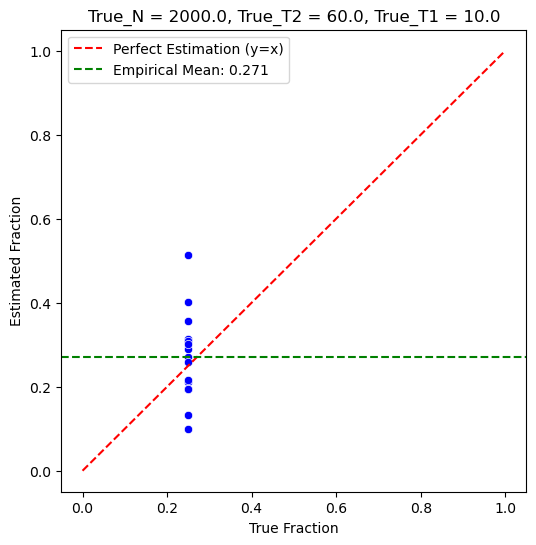

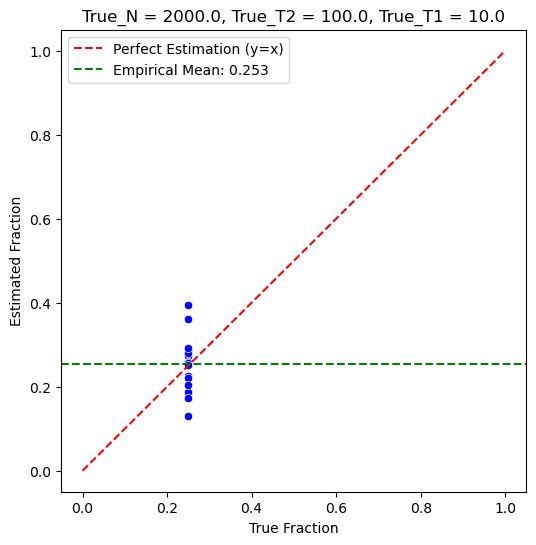

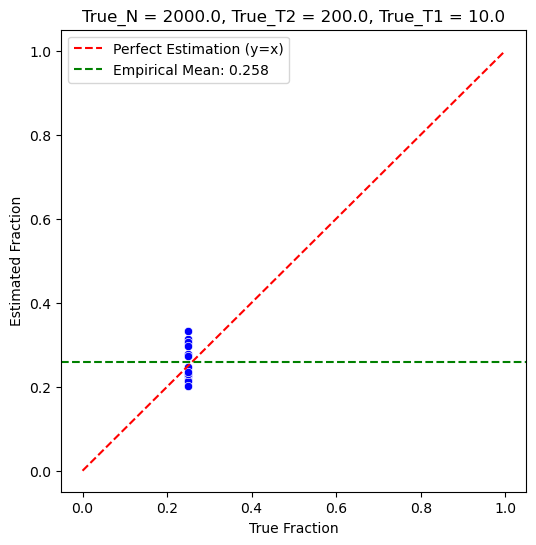

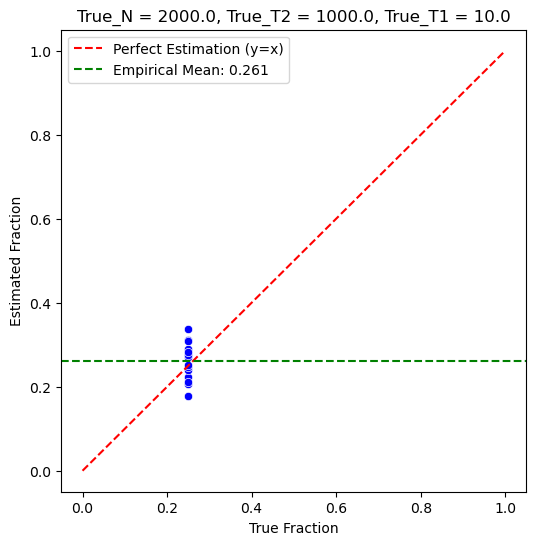

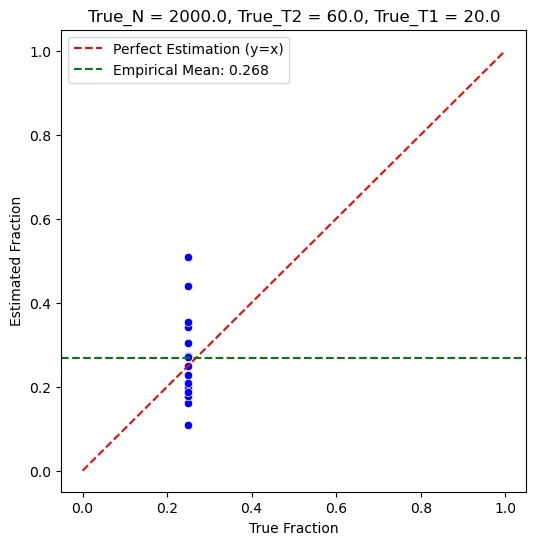

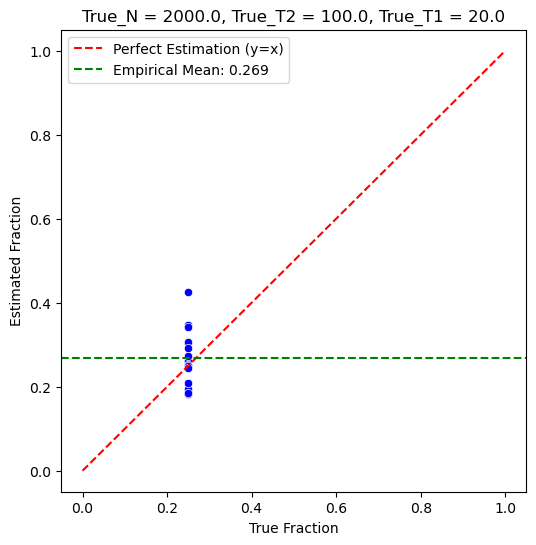

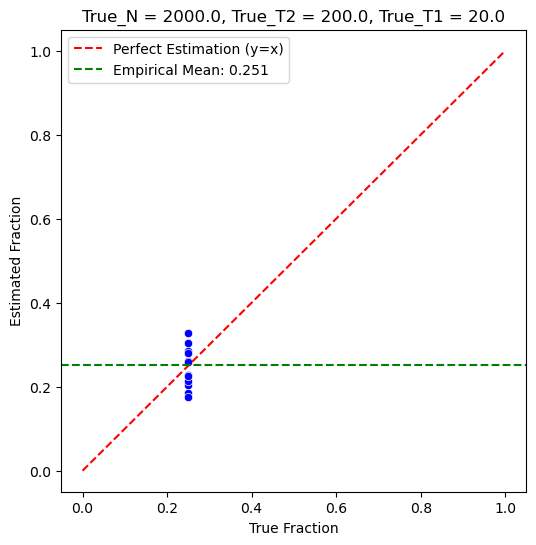

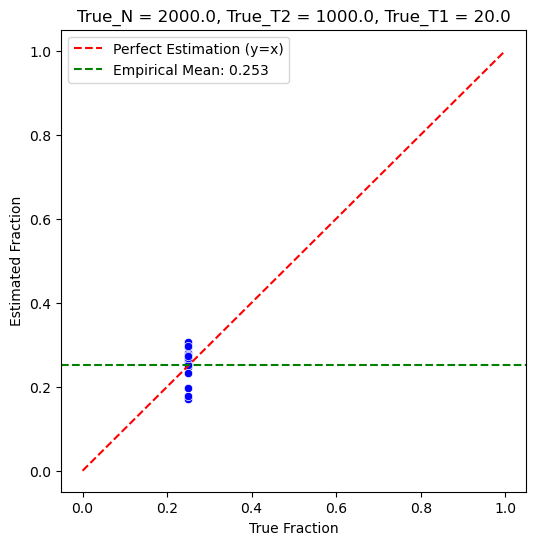

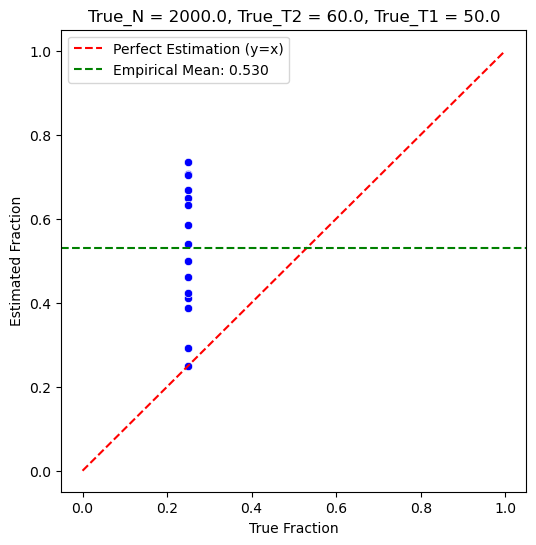

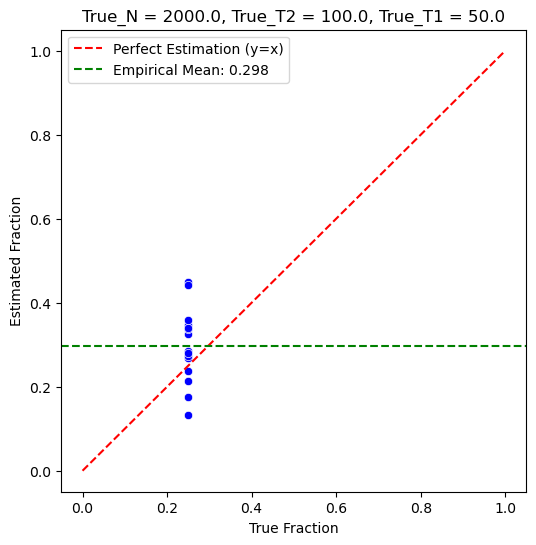

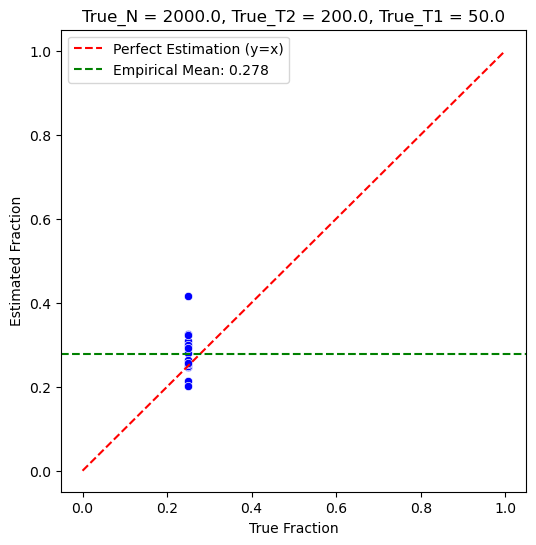

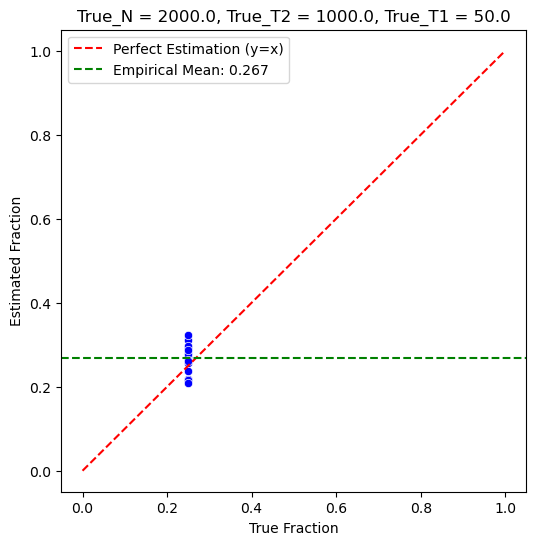

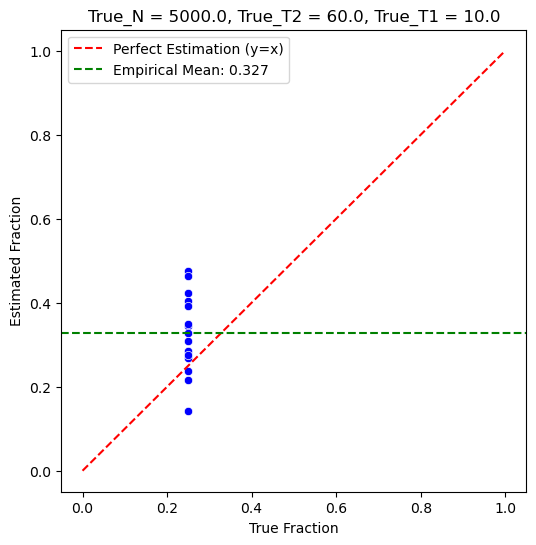

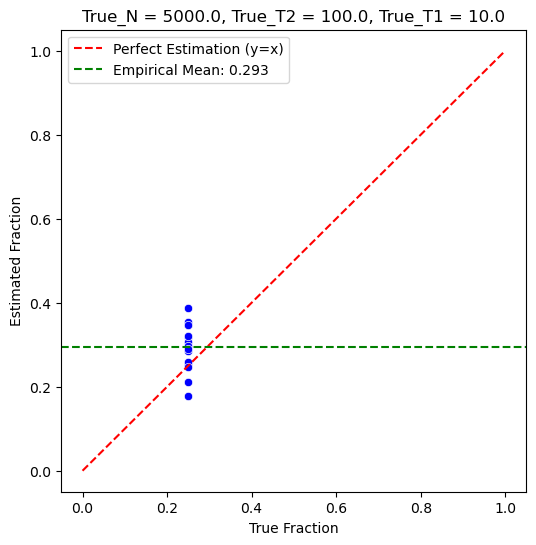

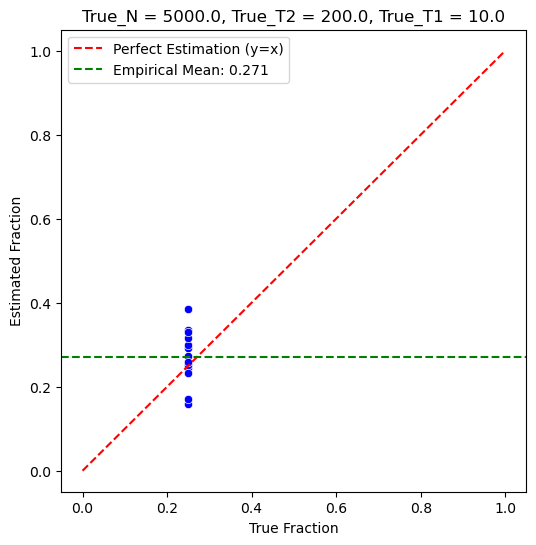

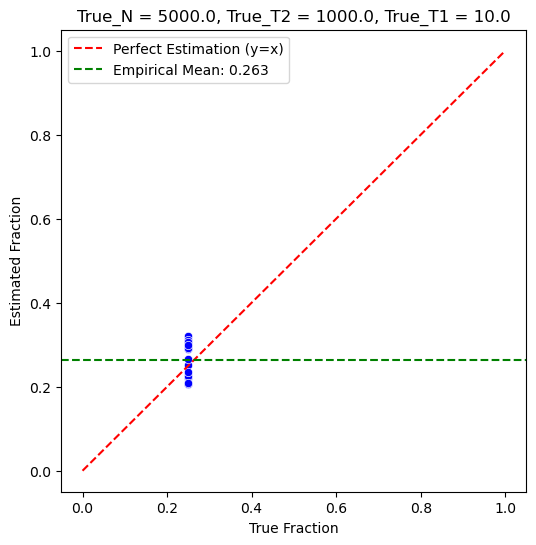

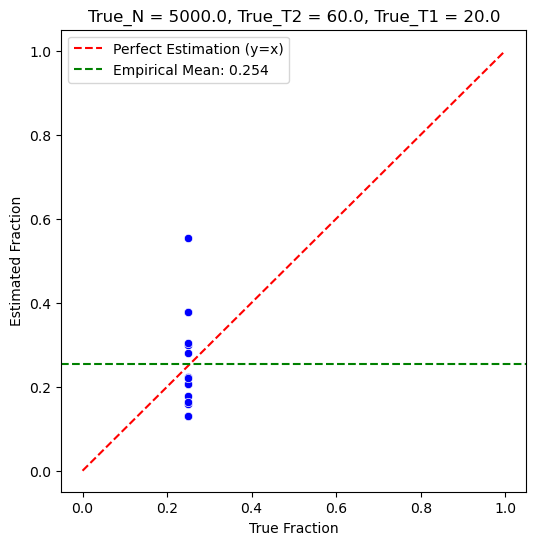

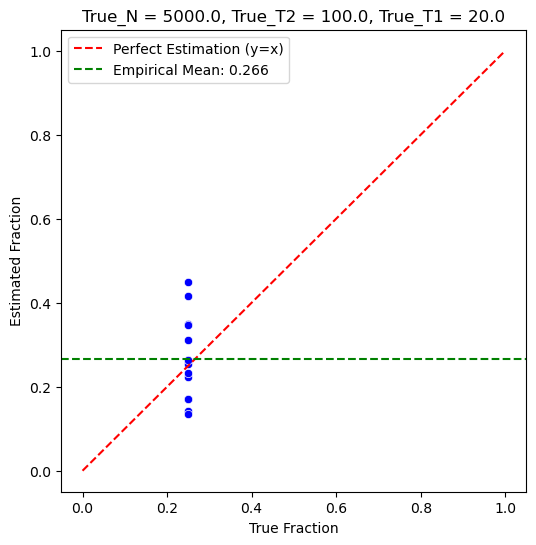

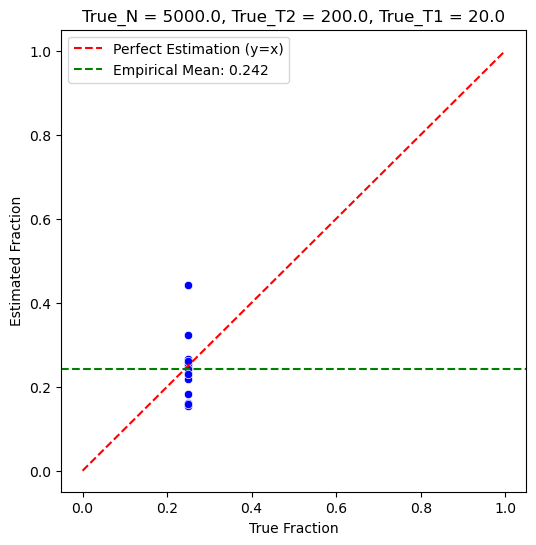

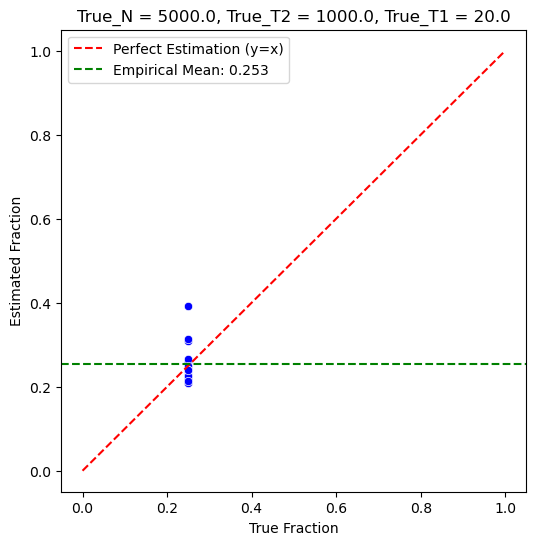

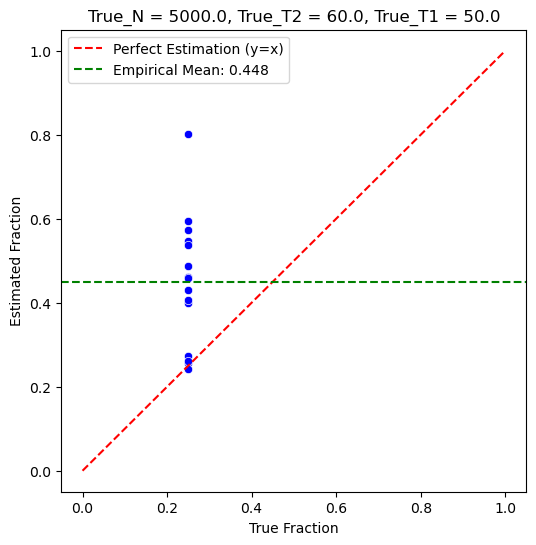

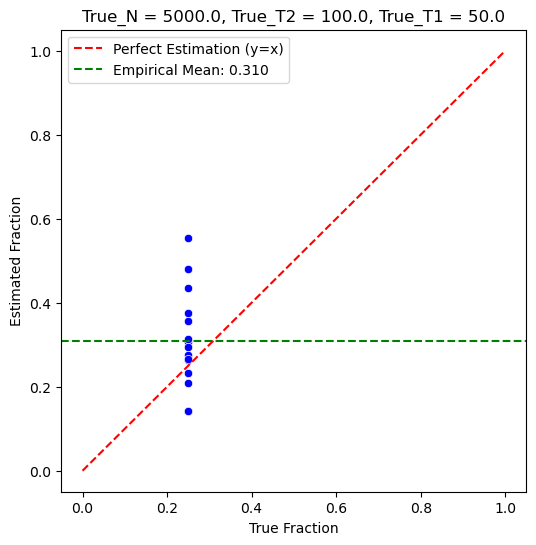

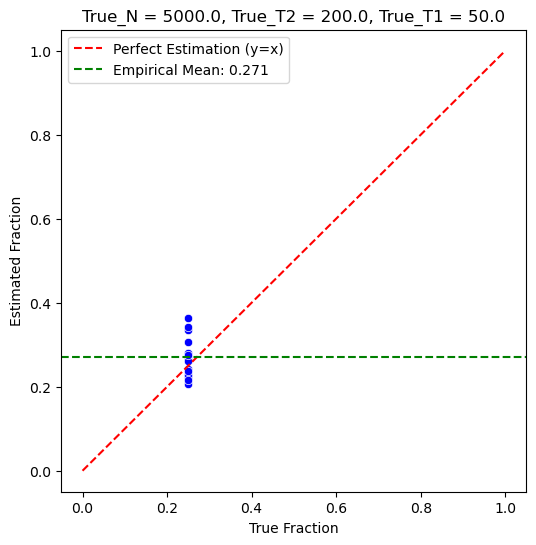

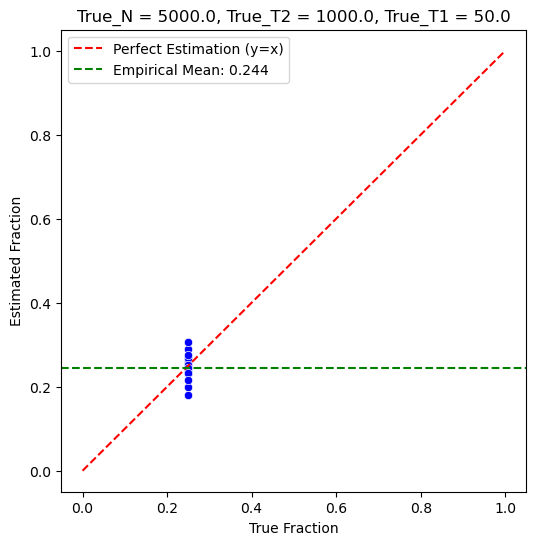

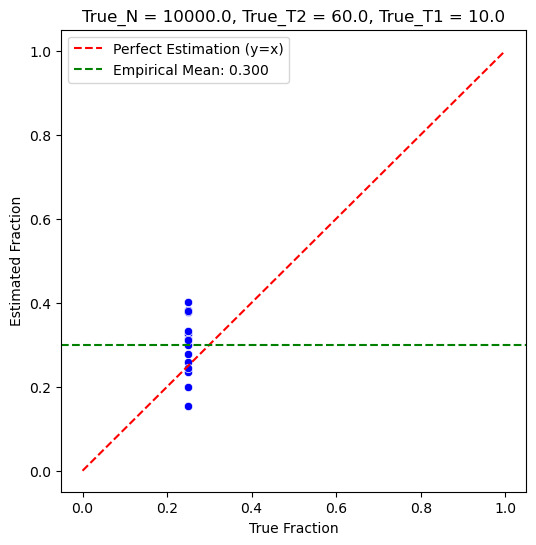

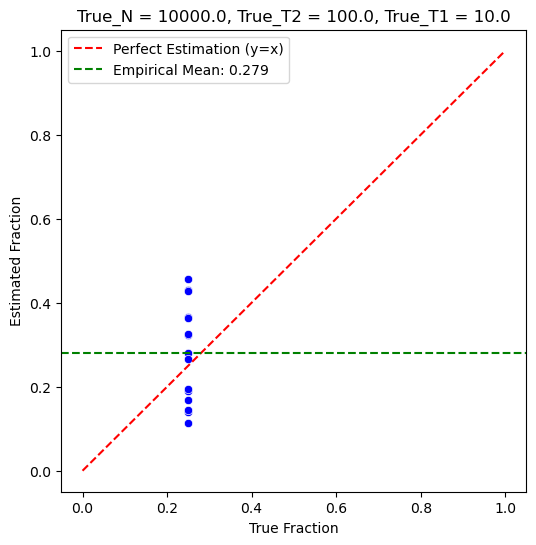

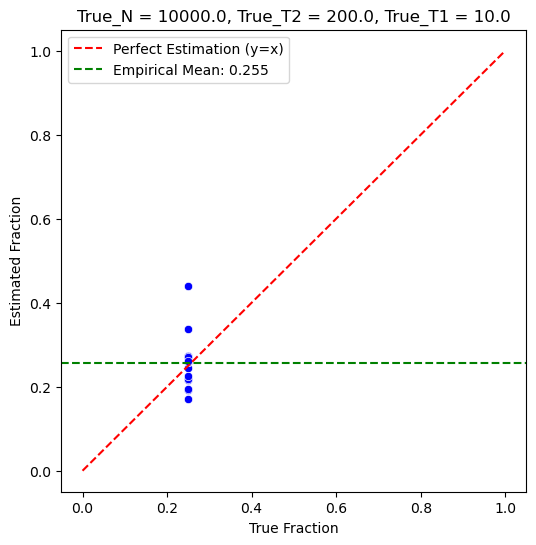

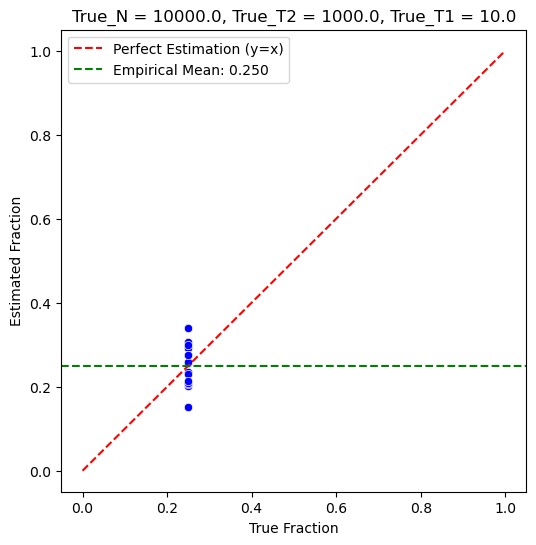

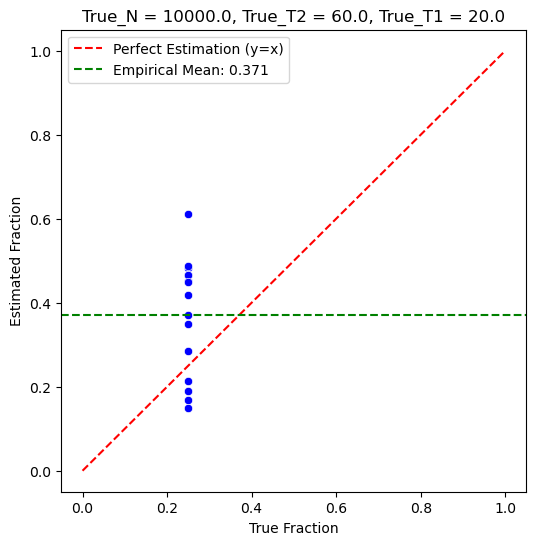

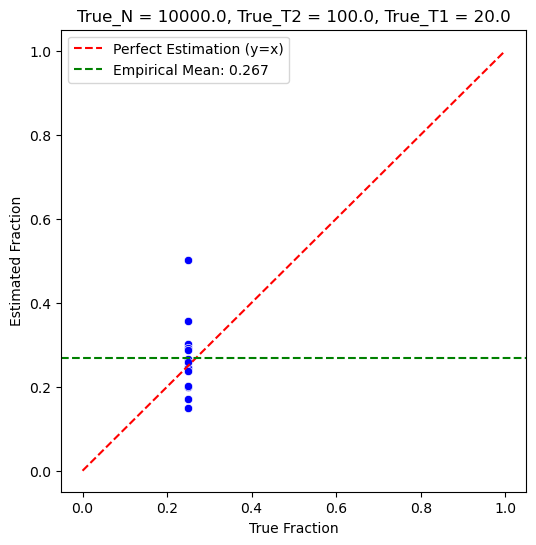

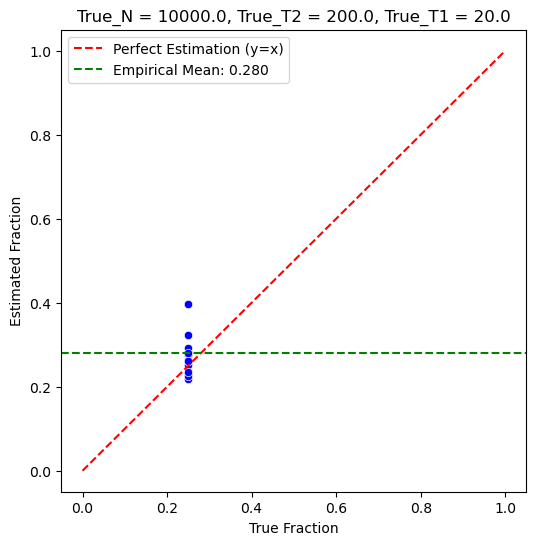

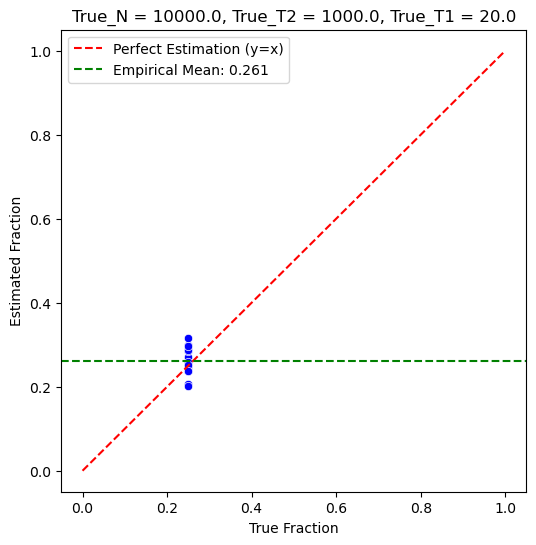

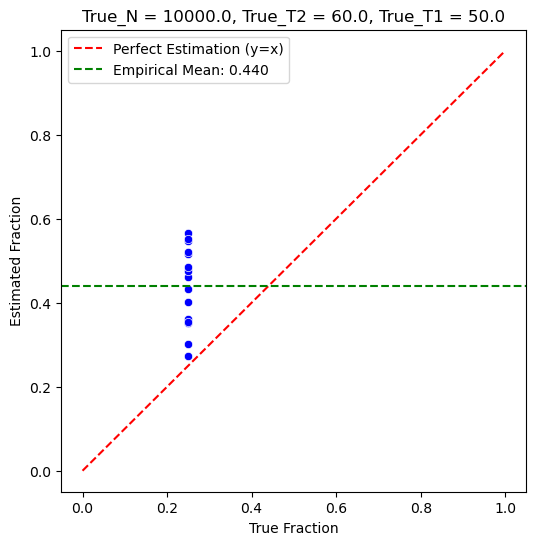

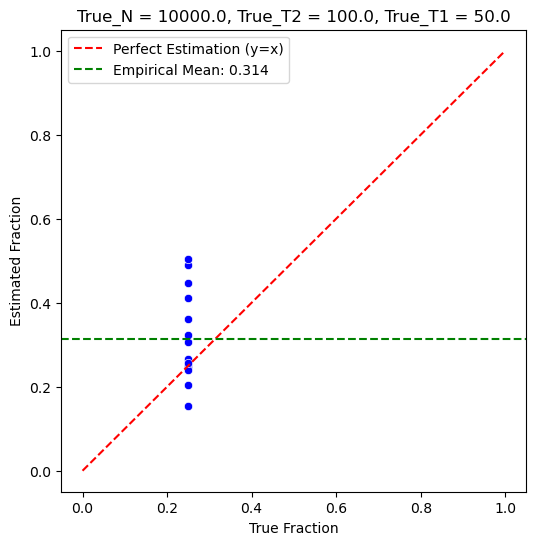

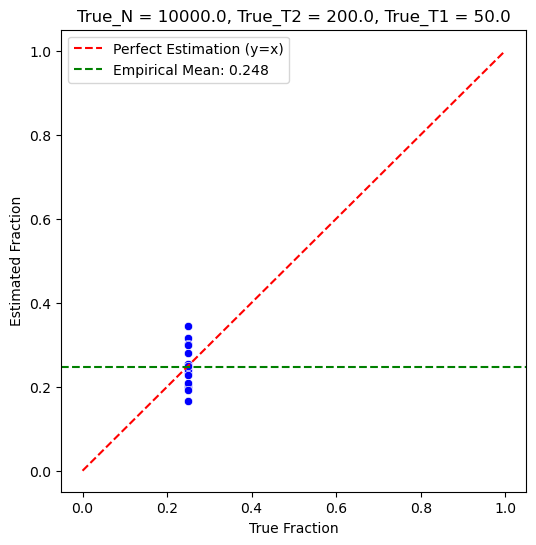

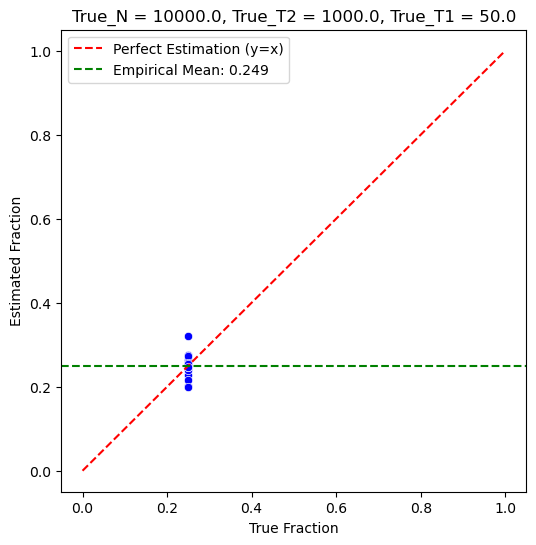

In [47]:
df = output
unique_sets = df[['True_N', 'True_T2', 'True_T1']].drop_duplicates()
for _, row in unique_sets.iterrows():
    true_N, true_T2, True_T1= row['True_N'], row['True_T2'], row['True_T1']
    
    # Filter data
    subset = df[(df['True_N'] == true_N) & (df['True_T2'] == true_T2) &(df['True_T1'] == True_T1)]
    
    # Create scatter plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=subset['True_fraction'], y=subset['Estimated_fraction'], color='blue')
    empirical_mean = subset['Estimated_fraction'].mean()
    
    # Plot y=x reference line
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Perfect Estimation (y=x)')
    plt.axhline(empirical_mean, linestyle='--', color='green', label=f'Empirical Mean: {empirical_mean:.3f}')
    # Labels and title
    plt.xlabel("True Fraction")
    plt.ylabel("Estimated Fraction")
    plt.title(f"True_N = {true_N}, True_T2 = {true_T2}, True_T1 = {True_T1}")
    plt.legend()
    
    # Show plot
    plt.show()


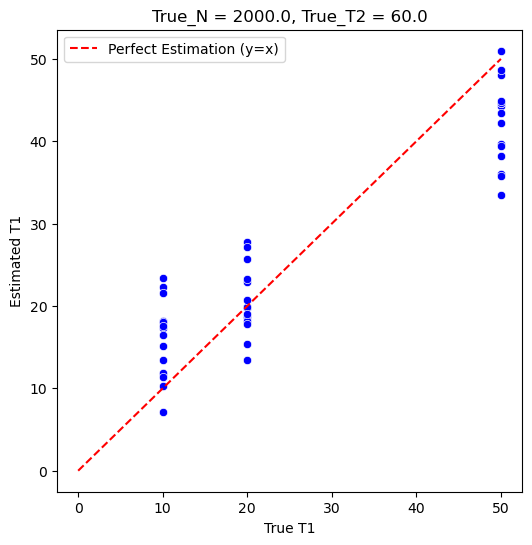

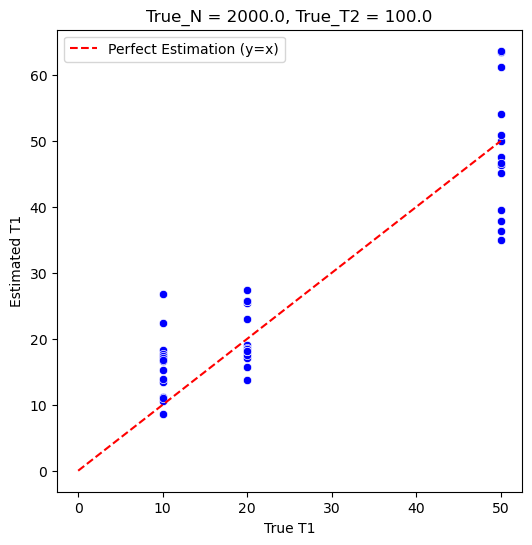

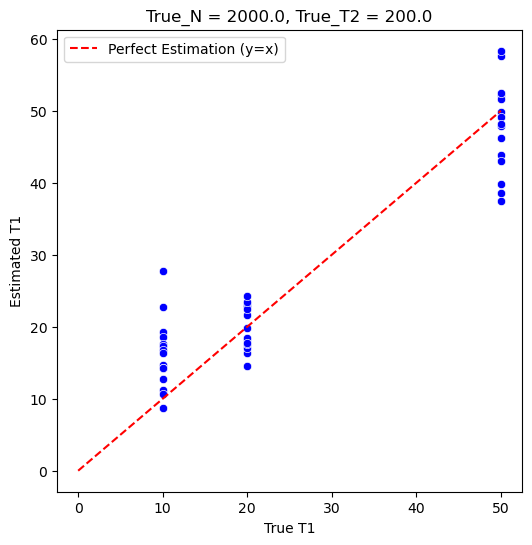

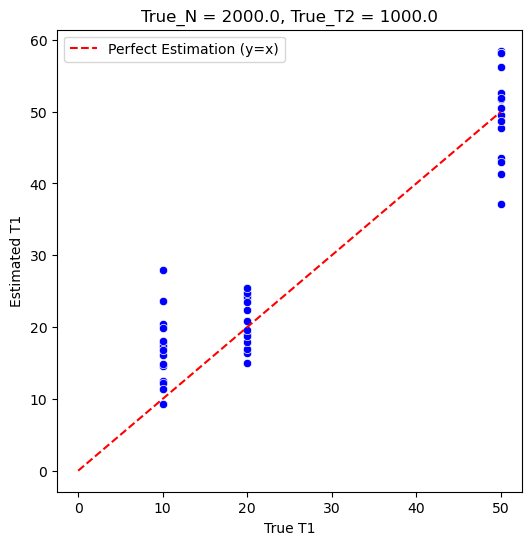

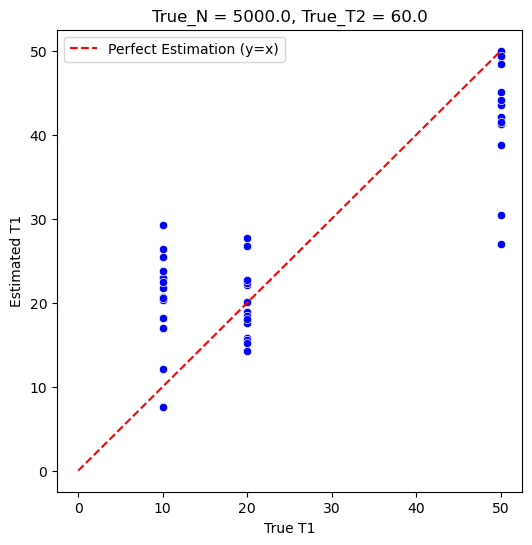

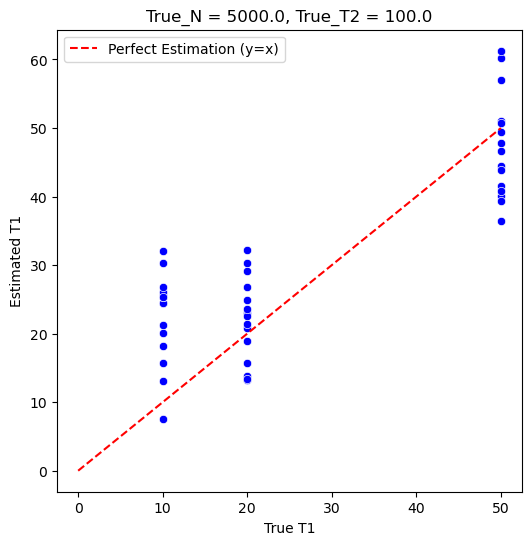

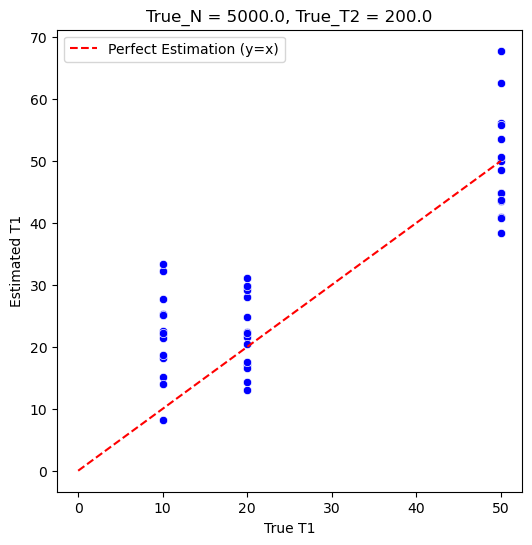

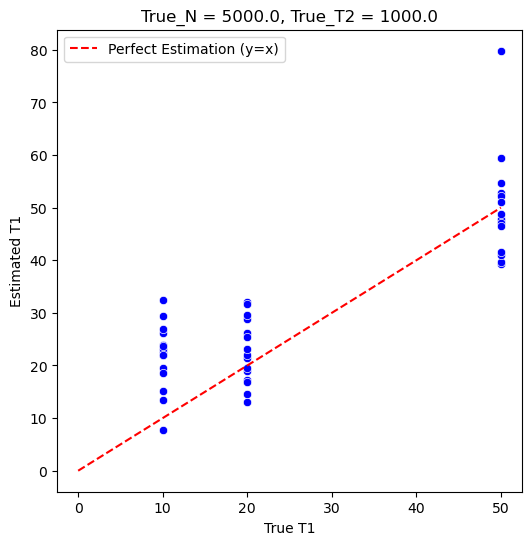

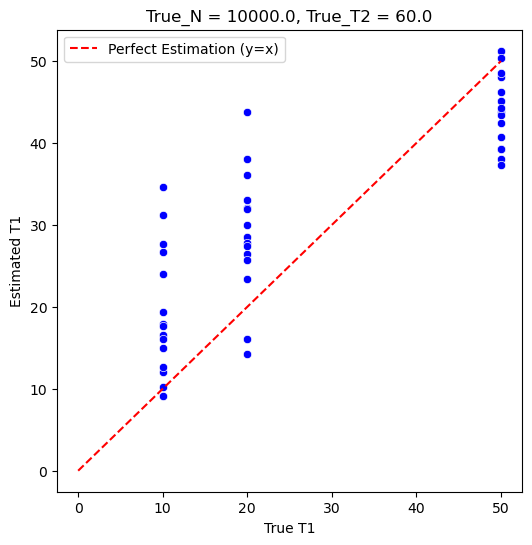

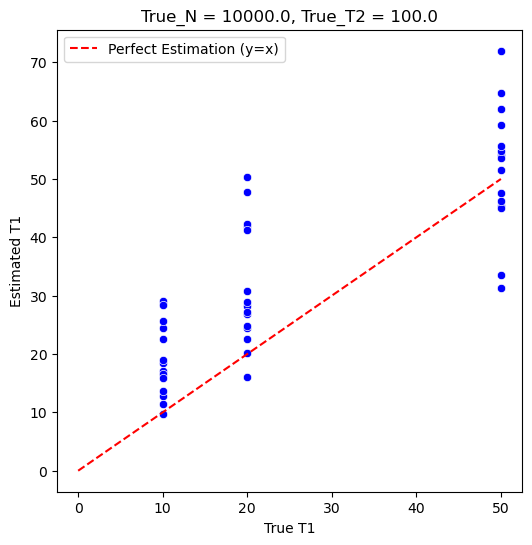

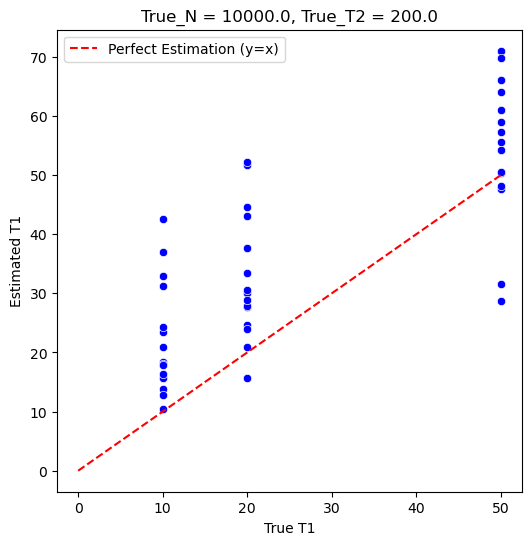

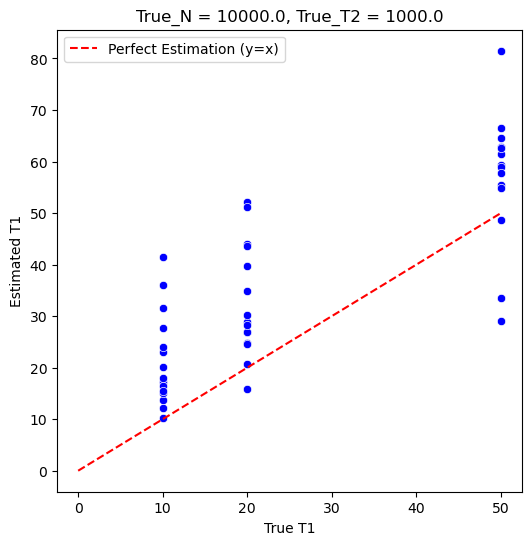

In [48]:
unique_sets = df[['True_N', 'True_T2']].drop_duplicates()
for _, row in unique_sets.iterrows():
    true_N, true_T2 = row['True_N'], row['True_T2']
    
    # Filter data
    subset = df[(df['True_N'] == true_N) & (df['True_T2'] == true_T2)]
    
    # Create scatter plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=subset['True_T1'], y=subset['Estimated_T1'], color='blue')
    
    # Plot y=x reference line
    plt.plot([0, 50], [0, 50], linestyle='--', color='red', label='Perfect Estimation (y=x)')
    
    # Labels and title
    plt.xlabel("True T1")
    plt.ylabel("Estimated T1")
    plt.title(f"True_N = {true_N}, True_T2 = {true_T2}")
    plt.legend()
    
    # Show plot
    plt.show()

In [5]:
df = pd.read_json("base_200.json")
print(df.head())

    index  number  fraction      u     v   group  true_N  true_T1  true_T2  \
0  [0, 1]       6  0.010235  0.325  0.35  [0, 0]    2000       10       60   
1  [0, 2]       6  0.010112  0.325  0.35  [0, 0]    2000       10       60   
2  [0, 3]       2  0.003304  0.325  0.35  [0, 0]    2000       10       60   
3  [0, 4]       3  0.005056  0.325  0.35  [0, 0]    2000       10       60   
4  [0, 5]       2  0.003378  0.325  0.35  [0, 0]    2000       10       60   

   true_T3  
0      260  
1      260  
2      260  
3      260  
4      260  


In [3]:
basemodel = CmdStanModel(stan_file = 'baseA_admixture.stan')

21:10:35 - cmdstanpy - INFO - compiling stan file E:\code\admix_stan\data_file\baseA_admixture.stan to exe file E:\code\admix_stan\data_file\baseA_admixture.exe
21:11:06 - cmdstanpy - INFO - compiled model executable: E:\code\admix_stan\data_file\baseA_admixture.exe


In [6]:
base_d = df[['number','u','v','group']][(df['true_T1'] == 20) & (df['true_T2'] == 100)&(df['true_T3'] == 1000) & (df['true_N'] == 5000)]
base_inference = base_d.to_dict(orient='list')
base_inference['N_obs'] = len(base_inference['number'])
base_inference['length'] = 200
base_inference['N_obs']

19500

In [8]:
v = basemodel.pathfinder(data = base_inference,seed = 100)
estimated_fraction = sum(v.stan_variable('fraction'))/len(v.stan_variable('fraction'))
print(estimated_fraction)

22:53:37 - cmdstanpy - INFO - Chain [1] start processing
22:54:40 - cmdstanpy - INFO - Chain [1] done processing


0.44207880299999985


In [17]:
base_d[base_d['number']==1]

,number,u,v,group
1014005,1,0.325,0.35,"[0, 0]"
1014007,1,0.325,0.35,"[0, 0]"
1014010,1,0.325,0.35,"[0, 0]"
1014014,1,0.325,0.35,"[0, 0]"
1014015,1,0.325,0.35,"[0, 0]"
...,...,...,...,...
1032733,1,10.000,200.00,"[0, 0]"
1033090,1,10.000,200.00,"[1, 1]"
1033310,1,10.000,200.00,"[2, 2]"
1033336,1,10.000,200.00,"[2, 2]"
